### 데이터사이언스융합학과 2024710658 박창준

# Google Colab amount

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

### 패키치 설치 및 불러오기

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans
from catboost import CatBoostClassifier, Pool

C:\Dev\miniconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


데이터 출처 : https://dacon.io/competitions/official/235713/data

### 변수 설명
- index : index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
        ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준
        ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부
        ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식
        ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - 낮을 수록 높은 신용의 신용카드 사용자를 의미함

### Data Load

In [3]:
df = pd.read_csv("D:/박창준 문서/4. 대학교육/2. 성균관대학교 일반대학원/Code/Credit_Card_Members.csv")

In [4]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['credit'])  # 종속 변수를 제외한 모든 독립 변수들
y = df['credit']  # 종속 변수


In [5]:
# 실험
y = pd.concat([y[y != 2], y[y == 2][:1600]], axis = 0)

In [6]:
df = pd.merge(y.to_frame(), X, left_index=True, right_index=True)

In [7]:
X = df.drop(columns=['credit'])  # 종속 변수를 제외한 모든 독립 변수들
y = df['credit']  # 종속 변수

In [8]:
# train과 test 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle = True)

In [9]:
train = pd.concat([X_train, y_train], axis=1)
# 인덱스를 다시 설정
train.reset_index(drop=True, inplace=True)

In [10]:
test = pd.concat([X_test, y_test], axis=1)
# 인덱스를 다시 설정
test.reset_index(drop=True, inplace=True)

In [11]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,14647,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-20369,365243,1,0,0,0,NaN,2.0,-4.0,1.0
1,1076,F,N,N,0,157500.0,Working,Higher education,Married,House / apartment,-11615,-2936,1,0,0,0,Sales staff,2.0,-7.0,2.0
2,20590,M,Y,N,1,202500.0,Working,Incomplete higher,Married,House / apartment,-11745,-231,1,1,0,0,Drivers,3.0,-2.0,0.0
3,12646,F,N,Y,1,315000.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,-11206,-2514,1,0,0,1,Core staff,3.0,0.0,0.0
4,12612,M,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,Rented apartment,-10448,-2323,1,1,0,1,NaN,2.0,-14.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8866,9386,F,Y,N,0,315000.0,Working,Higher education,Married,Co-op apartment,-13064,-2286,1,1,0,0,Medicine staff,2.0,-19.0,1.0
8867,5570,M,Y,N,1,157500.0,Working,Secondary / secondary special,Separated,House / apartment,-11332,-673,1,1,0,0,Laborers,2.0,-26.0,0.0
8868,12252,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-23596,365243,1,0,0,0,NaN,1.0,-8.0,1.0
8869,18360,F,Y,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,-14683,-5355,1,0,0,0,Sales staff,4.0,-24.0,0.0


In [12]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1477,M,N,Y,0,180000.0,State servant,Secondary / secondary special,Married,House / apartment,-15730,-8316,1,0,0,0,Laborers,2.0,-21.0,2.0
1,19225,M,Y,N,1,202500.0,Working,Incomplete higher,Married,House / apartment,-11745,-231,1,1,0,0,Drivers,3.0,-1.0,0.0
2,15450,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-17143,-5507,1,0,1,0,NaN,2.0,-44.0,1.0
3,2357,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-12444,-2752,1,0,0,0,NaN,2.0,-48.0,2.0
4,603,F,N,N,1,180000.0,Working,Incomplete higher,Married,With parents,-9911,-2665,1,0,0,0,NaN,3.0,-13.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,897,M,Y,N,0,540000.0,Commercial associate,Higher education,Married,House / apartment,-17249,-1688,1,0,0,0,Laborers,2.0,-34.0,2.0
2214,24663,F,N,Y,1,162000.0,Working,Secondary / secondary special,Married,House / apartment,-12673,-1236,1,0,1,1,NaN,3.0,-38.0,0.0
2215,10160,F,N,Y,0,180000.0,Pensioner,Higher education,Single / not married,House / apartment,-23633,365243,1,0,0,0,NaN,1.0,-59.0,0.0
2216,24798,M,Y,Y,2,157500.0,Commercial associate,Higher education,Married,With parents,-14192,-626,1,0,0,0,Drivers,4.0,-2.0,1.0


### EDA & Preprocessing

1) 개형 확인

In [13]:
train.shape

(8871, 20)

In [14]:
test.shape

(2218, 20)

2) 컬럼별 자료형 확인

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8871 non-null   int64  
 1   gender         8871 non-null   object 
 2   car            8871 non-null   object 
 3   reality        8871 non-null   object 
 4   child_num      8871 non-null   int64  
 5   income_total   8871 non-null   float64
 6   income_type    8871 non-null   object 
 7   edu_type       8871 non-null   object 
 8   family_type    8871 non-null   object 
 9   house_type     8871 non-null   object 
 10  DAYS_BIRTH     8871 non-null   int64  
 11  DAYS_EMPLOYED  8871 non-null   int64  
 12  FLAG_MOBIL     8871 non-null   int64  
 13  work_phone     8871 non-null   int64  
 14  phone          8871 non-null   int64  
 15  email          8871 non-null   int64  
 16  occyp_type     6138 non-null   object 
 17  family_size    8871 non-null   float64
 18  begin_mo

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2218 non-null   int64  
 1   gender         2218 non-null   object 
 2   car            2218 non-null   object 
 3   reality        2218 non-null   object 
 4   child_num      2218 non-null   int64  
 5   income_total   2218 non-null   float64
 6   income_type    2218 non-null   object 
 7   edu_type       2218 non-null   object 
 8   family_type    2218 non-null   object 
 9   house_type     2218 non-null   object 
 10  DAYS_BIRTH     2218 non-null   int64  
 11  DAYS_EMPLOYED  2218 non-null   int64  
 12  FLAG_MOBIL     2218 non-null   int64  
 13  work_phone     2218 non-null   int64  
 14  phone          2218 non-null   int64  
 15  email          2218 non-null   int64  
 16  occyp_type     1546 non-null   object 
 17  family_size    2218 non-null   float64
 18  begin_mo

3) target (credit 컬럼) 확인

In [17]:
train['credit'].value_counts()

credit
1.0    5013
0.0    2578
2.0    1280
Name: count, dtype: int64

In [18]:
train['credit'].value_counts(normalize=True)

credit
1.0    0.56510
0.0    0.29061
2.0    0.14429
Name: proportion, dtype: float64

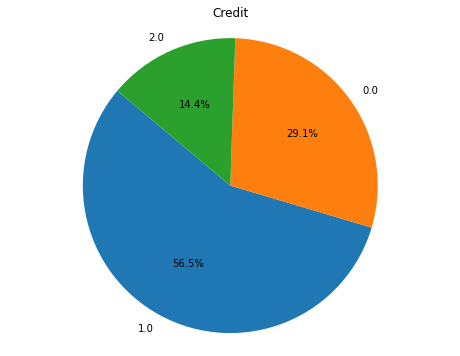

In [19]:
import matplotlib.pyplot as plt

# credit 컬럼의 값 빈도 계산
credit_counts = train['credit'].value_counts()

# 시각화
plt.figure(figsize=(8, 6))
plt.pie(credit_counts, labels=credit_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Credit')
plt.axis('equal')
plt.show()

4)  Numeric column, Categorical column 나누기

In [20]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [21]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'credit']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [22]:
print(numerical_list)
print(categorical_list)

['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'credit']


4) 컬럼별 이상치분석

- Numerical Data

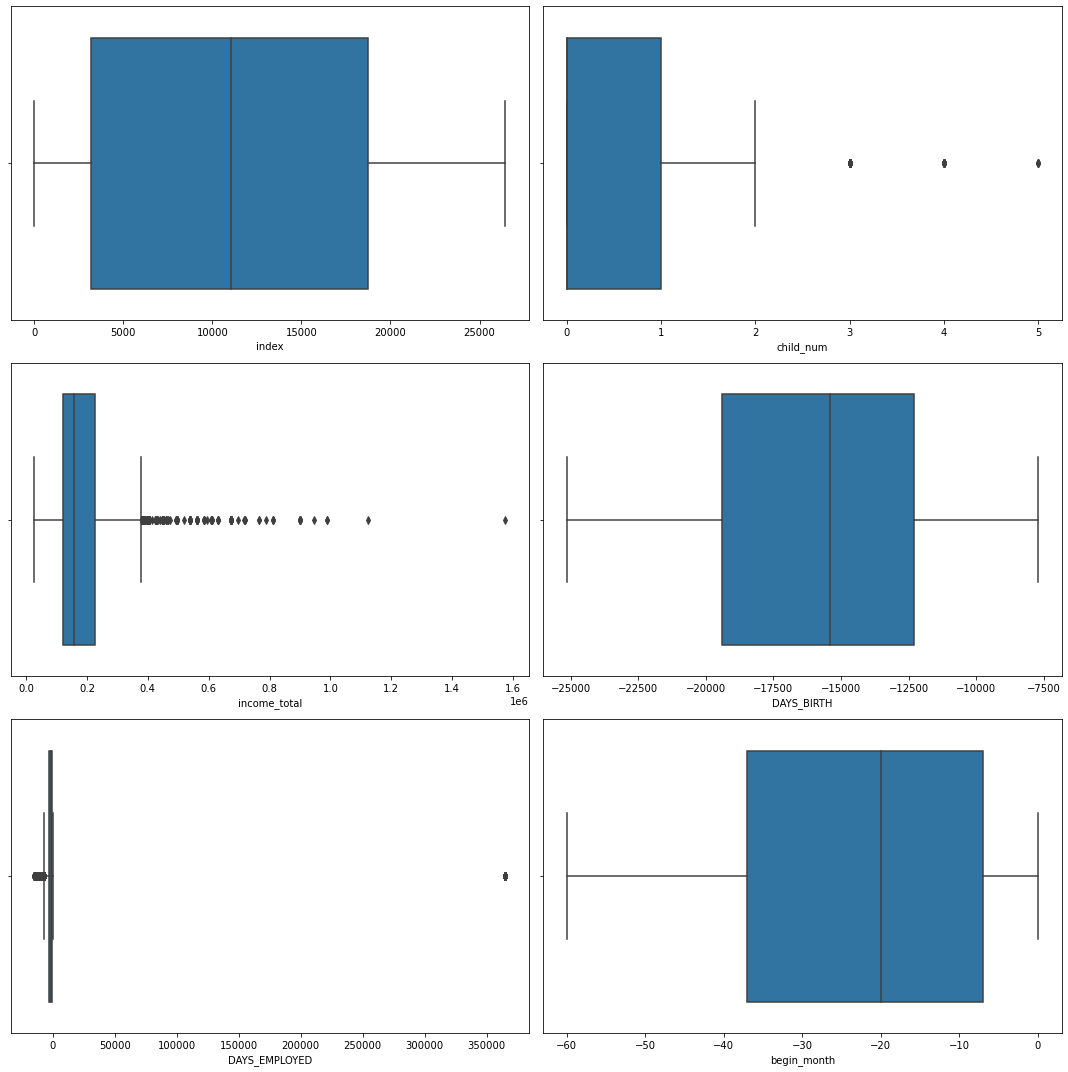

In [23]:
def visualize_outliers_iqr(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols // 2, 2, figsize=(15, 15))
    for i, col in enumerate(columns):
        row = i // 2
        col = i % 2
        Q1 = df[columns[i]].quantile(0.25)  # 수정 필요: df[col] -> df[columns[i]]
        Q3 = df[columns[i]].quantile(0.75)  # 수정 필요: df[col] -> df[columns[i]]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[((df[columns[i]] < lower_bound) | (df[columns[i]] > upper_bound))]
        sns.boxplot(x=df[columns[i]], ax=axes[row, col])
    plt.tight_layout()
    plt.show()

# 이상치 분석 및 시각화
visualize_outliers_iqr(train, numerical_list)

    (4-1) child_num >= 7인 경우 모두 credit = 2 를 보여줌

In [24]:
train[train['child_num'] >= 7][['child_num', 'credit']]

,child_num,credit


    (4-1) child_num >= 7인 경우 제거

In [25]:
train = train[train['child_num'] < 8]

In [26]:
train[train['child_num'] > 7]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


    (4-2) DAYS_EMPLOYED == 365243인 컬럼이 train 4,438개이며, 이때의 occyp_type은 전부 'NaN'

In [27]:
train[train['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'occyp_type', 'credit']]

,DAYS_EMPLOYED,occyp_type,credit
0,365243,NaN,1.0
10,365243,NaN,1.0
11,365243,NaN,0.0
14,365243,NaN,0.0
18,365243,NaN,0.0
...,...,...,...
8837,365243,NaN,1.0
8841,365243,NaN,2.0
8846,365243,NaN,2.0
8854,365243,NaN,0.0


    (4-2) DAYS_EMPLOYED == 365243인 컬럼이 df에서는 6,135개

In [28]:
train[train['DAYS_EMPLOYED'] == 365243][['DAYS_EMPLOYED', 'occyp_type']]

,DAYS_EMPLOYED,occyp_type
0,365243,NaN
10,365243,NaN
11,365243,NaN
14,365243,NaN
18,365243,NaN
...,...,...
8837,365243,NaN
8841,365243,NaN
8846,365243,NaN
8854,365243,NaN


    (4-2) 365243일이면 연으로 환산시 1,000년이 넘으므로, 잘못된 값으로 판단.
          DAYS_EMPLOYED == 365243인 컬럼 모두 0으로 변환

In [29]:
train.loc[train['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = 0

In [30]:
train.loc[train['DAYS_EMPLOYED'] == 0, 'DAYS_EMPLOYED']

0       0
10      0
11      0
14      0
18      0
       ..
8837    0
8841    0
8846    0
8854    0
8868    0
Name: DAYS_EMPLOYED, Length: 1539, dtype: int64

- Categorical Data

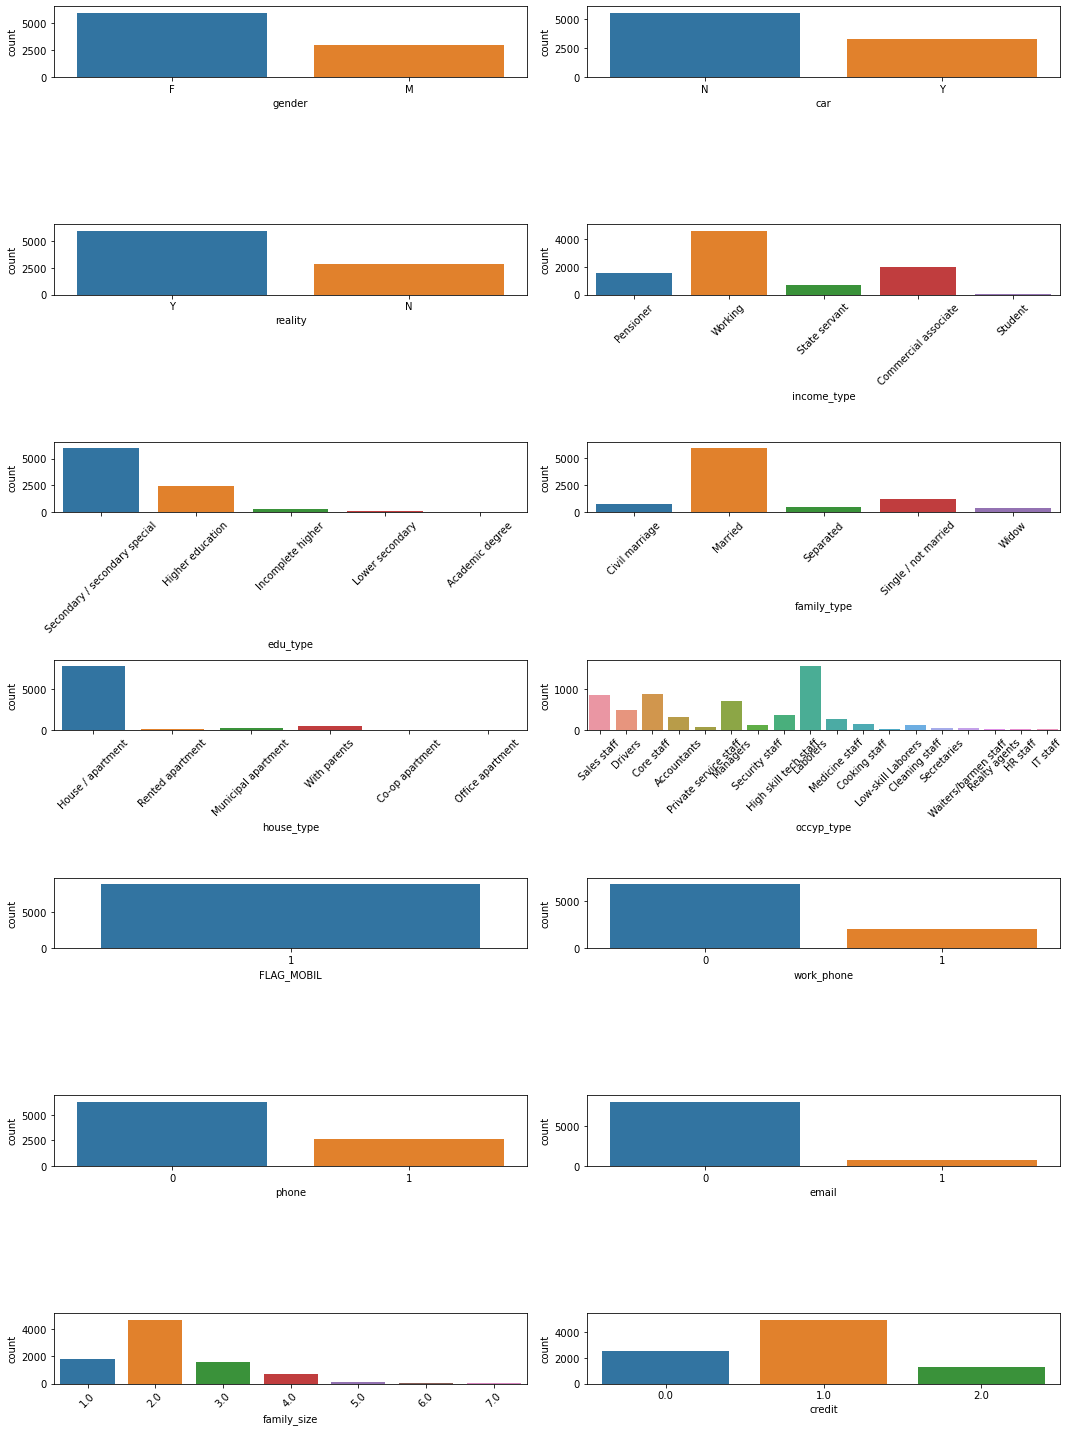

In [31]:
def visualize_categorical(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots((num_cols + 1) // 2, 2, figsize=(15, 20))
    for i, col in enumerate(columns):
        row = i // 2
        col = i % 2
        sns.countplot(x=columns[i], data=df, ax=axes[row, col])
        if len(df[columns[i]].unique()) >= 4:
            axes[row, col].tick_params(axis='x', rotation=45)  # x축 눈금 레이블 45도 회전
        axes[row, col].set_ylim(0, df[columns[i]].value_counts().max() * 1.1)  # y축 늘리기
    plt.tight_layout()
    plt.show()

# 카테고리컬 변수 시각화
visualize_categorical(train, categorical_list)

    (4-3) family_size >= 7인 경우 모두 credit = 2 를 보여줌

In [32]:
train[train['family_size'] >= 7][['family_size', 'credit']]

,family_size,credit
638,7.0,0.0
1269,7.0,1.0
1559,7.0,0.0
1681,7.0,1.0
2465,7.0,1.0
8015,7.0,1.0


    (4-3) family_size > 7인 경우 전부 제거

In [33]:
train = train[train['family_size'] < 8]

In [34]:
train[train['family_size'] >= 8]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


5) 데이터 정확성 확인

In [35]:
train['age'] = (train['DAYS_BIRTH'] * -1) // 365
test['age'] = (test['DAYS_BIRTH'] * -1) // 365

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8871 entries, 0 to 8870
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8871 non-null   int64  
 1   gender         8871 non-null   object 
 2   car            8871 non-null   object 
 3   reality        8871 non-null   object 
 4   child_num      8871 non-null   int64  
 5   income_total   8871 non-null   float64
 6   income_type    8871 non-null   object 
 7   edu_type       8871 non-null   object 
 8   family_type    8871 non-null   object 
 9   house_type     8871 non-null   object 
 10  DAYS_BIRTH     8871 non-null   int64  
 11  DAYS_EMPLOYED  8871 non-null   int64  
 12  FLAG_MOBIL     8871 non-null   int64  
 13  work_phone     8871 non-null   int64  
 14  phone          8871 non-null   int64  
 15  email          8871 non-null   int64  
 16  occyp_type     6138 non-null   object 
 17  family_size    8871 non-null   float64
 18  begin_mo

    (5-1) 퇴직할 나이가 아닌데도 불구하고 연급 수령을 받는사람 조회

In [37]:
train[(train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()) & (train['age'] < 60)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,14647,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,NaN,2.0,-4.0,1.0,55
10,4749,F,N,N,0,54000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-12.0,1.0,55
11,10685,F,N,Y,0,132750.0,Pensioner,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-32.0,0.0,55
14,19834,M,Y,Y,1,270000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,3.0,-44.0,0.0,51
50,13742,F,N,Y,0,328500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,NaN,2.0,-47.0,0.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,15934,F,Y,N,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-17.0,1.0,56
8825,21285,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-43.0,1.0,56
8836,9097,F,Y,N,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-7.0,1.0,59
8846,178,M,N,N,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-12.0,2.0,55


    (5-2) 31세 미만의 Pensioner(연급수급자)는 이상치로 분류하여 삭제

In [38]:
train = train.drop(train[(train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()) & (train['age'] < 31)].index)

In [39]:
# test = test.drop(test[(test['income_type'] == 'Pensioner') & (test['occyp_type'].isna()) & (test['age'] < 31)].index)

In [40]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,14647,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,NaN,2.0,-4.0,1.0,55
1,1076,F,N,N,0,157500.0,Working,Higher education,Married,House / apartment,...,-2936,1,0,0,0,Sales staff,2.0,-7.0,2.0,31
2,20590,M,Y,N,1,202500.0,Working,Incomplete higher,Married,House / apartment,...,-231,1,1,0,0,Drivers,3.0,-2.0,0.0,32
3,12646,F,N,Y,1,315000.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,...,-2514,1,0,0,1,Core staff,3.0,0.0,0.0,30
4,12612,M,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,Rented apartment,...,-2323,1,1,0,1,NaN,2.0,-14.0,1.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8866,9386,F,Y,N,0,315000.0,Working,Higher education,Married,Co-op apartment,...,-2286,1,1,0,0,Medicine staff,2.0,-19.0,1.0,35
8867,5570,M,Y,N,1,157500.0,Working,Secondary / secondary special,Separated,House / apartment,...,-673,1,1,0,0,Laborers,2.0,-26.0,0.0,31
8868,12252,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-8.0,1.0,64
8869,18360,F,Y,Y,2,135000.0,State servant,Secondary / secondary special,Married,House / apartment,...,-5355,1,0,0,0,Sales staff,4.0,-24.0,0.0,40


    (5-3) 31세 이상 ~ 60세 미만의 연급수급자는 income_type을 Pensioner_Special로 변경

In [41]:
train.loc[(train['age'] >= 31) & (train['age'] < 60) & (train['income_type'] == 'Pensioner'), 'income_type'] = 'Pensioner_Special'

In [42]:
test.loc[(test['age'] >= 31) & (test['age'] < 60) & (test['income_type'] == 'Pensioner'), 'income_type'] = 'Pensioner_Special'

    (5-4) child_num > 0 이면서 family_type == 'Single / not married인 경우를 확인

In [43]:
train[(train['family_type'] == 'Single / not married') & (train['child_num'] > 0)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
61,11418,F,N,Y,1,90000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-2706,1,0,0,0,Laborers,2.0,-45.0,1.0,32
101,1689,F,N,Y,1,337500.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-431,1,0,0,0,Accountants,2.0,-23.0,2.0,39
151,23896,F,N,Y,1,225000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-3327,1,0,0,0,NaN,2.0,-22.0,1.0,43
165,1656,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,...,-2479,1,0,0,0,Managers,2.0,-50.0,2.0,27
170,4422,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-1266,1,0,0,0,Private service staff,2.0,-3.0,1.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,1737,F,N,N,1,153000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-1738,1,0,1,0,Laborers,2.0,-7.0,2.0,47
8774,5828,M,N,Y,1,198000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,...,-140,1,0,0,0,Managers,2.0,-18.0,0.0,26
8794,14847,M,Y,Y,1,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-746,1,0,0,0,Drivers,2.0,-30.0,1.0,31
8802,3329,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-1266,1,0,0,0,Private service staff,2.0,-4.0,1.0,29


    (5-5) 미혼모, 입양 등의 경우가 있을 수 있으므로 family type을 'Adopt'으로 설정

In [44]:
train.loc[(train['family_type'] == 'Single / not married') & (train['child_num'] > 0), 'family_type'] = 'Adopt'

In [45]:
test.loc[(test['family_type'] == 'Single / not married') & (test['child_num'] > 0), 'family_type'] = 'Adopt'

In [46]:
train[train['family_type']== 'Adopt']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
61,11418,F,N,Y,1,90000.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-2706,1,0,0,0,Laborers,2.0,-45.0,1.0,32
101,1689,F,N,Y,1,337500.0,Commercial associate,Higher education,Adopt,House / apartment,...,-431,1,0,0,0,Accountants,2.0,-23.0,2.0,39
151,23896,F,N,Y,1,225000.0,Commercial associate,Higher education,Adopt,House / apartment,...,-3327,1,0,0,0,NaN,2.0,-22.0,1.0,43
165,1656,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Adopt,House / apartment,...,-2479,1,0,0,0,Managers,2.0,-50.0,2.0,27
170,4422,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-1266,1,0,0,0,Private service staff,2.0,-3.0,1.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,1737,F,N,N,1,153000.0,Commercial associate,Secondary / secondary special,Adopt,House / apartment,...,-1738,1,0,1,0,Laborers,2.0,-7.0,2.0,47
8774,5828,M,N,Y,1,198000.0,Commercial associate,Incomplete higher,Adopt,House / apartment,...,-140,1,0,0,0,Managers,2.0,-18.0,0.0,26
8794,14847,M,Y,Y,1,180000.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-746,1,0,0,0,Drivers,2.0,-30.0,1.0,31
8802,3329,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Adopt,House / apartment,...,-1266,1,0,0,0,Private service staff,2.0,-4.0,1.0,29


6) 결측치 확인 및 처리

In [47]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       2724
family_size         0
begin_month         0
credit              0
age                 0
dtype: int64

In [48]:
train_null = pd.DataFrame(train.isnull().sum(), columns=['null'])
train_null['null_ratio'] = train_null['null'] / len(train)
train_null.sort_values(by = ['null_ratio'], ascending = False)

,null,null_ratio
occyp_type,2724,0.30738
index,0,0.00000
DAYS_EMPLOYED,0,0.00000
credit,0,0.00000
begin_month,0,0.00000
family_size,0,0.00000
email,0,0.00000
phone,0,0.00000
work_phone,0,0.00000
FLAG_MOBIL,0,0.00000


    (6-1) age >= 60 이면서 income_type == 'Pensioner' 이면서 occyp_type == Nan인 경우,
          노후걱정 없는 은퇴자로 판단하여, 'Retired_Pensioner'로 대체

In [49]:
train[(train['age'] >= 60) & (train['income_type'] == 'Pensioner') & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
18,1540,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-51.0,0.0,60
54,500,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-5.0,2.0,64
59,1271,M,Y,Y,0,315000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-45.0,2.0,63
86,2295,F,N,Y,0,85500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-51.0,2.0,61
105,19631,F,N,Y,0,85500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,1,NaN,2.0,0.0,0.0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,597,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-7.0,2.0,61
8834,946,F,N,Y,0,193500.0,Pensioner,Incomplete higher,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-4.0,2.0,66
8837,21324,M,N,Y,0,49500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,NaN,2.0,-1.0,1.0,60
8841,48,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-4.0,2.0,64


In [50]:
test[(test['age'] >= 60) & (test['income_type'] == 'Pensioner') & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
17,59,F,N,Y,0,360000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-25.0,2.0,62
38,15559,F,N,N,0,135000.0,Pensioner,Higher education,Single / not married,House / apartment,...,365243,1,0,0,0,NaN,1.0,-14.0,1.0,65
43,11593,M,Y,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-17.0,1.0,63
53,25039,F,Y,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-42.0,1.0,62
75,11382,F,N,N,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-9.0,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,9859,M,Y,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,0.0,1.0,60
2178,9720,M,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-14.0,1.0,61
2179,1523,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-27.0,1.0,63
2199,11898,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-13.0,1.0,62


In [51]:
train.loc[(train['age'] >= 60) & (train['income_type'] == 'Pensioner') & (train['occyp_type'].isna()), 'occyp_type'] = 'Retired_Pensioner'
test.loc[(test['age'] >= 60) & (test['income_type'] == 'Pensioner') & (test['occyp_type'].isna()), 'occyp_type'] = 'Retired_Pensioner'

    (6-2) age >= 60이면서 DAYS_EMPLOYED != 0 이면서, occyp_type == Nan인 경우,
          퇴직하지 않고 일하고 있는 그룹으로 'Not_retired'으로 대체

In [52]:
train[(train['age']>=60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna())][['age', 'income_total','income_type', 'occyp_type', 'credit']]

,age,income_total,income_type,occyp_type,credit
315,64,112500.0,Working,NaN,1.0
402,60,135000.0,Working,NaN,1.0
627,64,112500.0,Working,NaN,1.0
736,61,166500.0,Working,NaN,2.0
974,65,112500.0,Commercial associate,NaN,1.0
1164,60,202500.0,State servant,NaN,0.0
1589,64,112500.0,Working,NaN,1.0
2086,60,135000.0,Working,NaN,1.0
2455,60,99000.0,Working,NaN,1.0
2726,60,202500.0,State servant,NaN,0.0


In [53]:
test[(test['age']>=60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna())][['age', 'income_total','income_type', 'occyp_type']]

,age,income_total,income_type,occyp_type
277,60,202500.0,State servant,NaN
590,64,112500.0,Working,NaN
599,62,360000.0,Commercial associate,NaN
759,60,202500.0,State servant,NaN
974,63,247500.0,Commercial associate,NaN


In [54]:
train.loc[(train['age'] >= 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'Not_retired'
test.loc[(test['age'] >= 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'Not_retired'

In [55]:
train[train['occyp_type'] == 'Not_retired']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
315,13758,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-469,1,0,0,0,Not_retired,2.0,-29.0,1.0,64
402,22655,F,N,Y,0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-229,1,0,1,0,Not_retired,1.0,-18.0,1.0,60
627,2437,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-469,1,0,0,0,Not_retired,2.0,-22.0,1.0,64
736,2281,F,N,N,0,166500.0,Working,Secondary / secondary special,Married,House / apartment,...,-5467,1,0,1,0,Not_retired,2.0,-32.0,2.0,61
974,16970,F,N,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,-2177,1,0,0,0,Not_retired,2.0,-1.0,1.0,65
1164,12960,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-39.0,0.0,60
1589,7289,F,N,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-469,1,0,0,0,Not_retired,2.0,-8.0,1.0,64
2086,25484,F,N,Y,0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,...,-229,1,0,1,0,Not_retired,1.0,-25.0,1.0,60
2455,13227,F,N,Y,0,99000.0,Working,Secondary / secondary special,Married,House / apartment,...,-14413,1,1,0,0,Not_retired,2.0,-59.0,1.0,60
2726,22256,F,Y,Y,0,202500.0,State servant,Higher education,Single / not married,House / apartment,...,-15038,1,0,1,0,Not_retired,1.0,-35.0,0.0,60


    (6-3) 'age' < 60 이면서 DAYS_EMPLOYED == 0 이면서, occyp_type == Nan인 경우,
           일을 하지 않는 그룹으로'unemployed'로 대체

In [56]:
train[(train['age'] < 60) & (train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,14647,F,N,Y,0,157500.0,Pensioner_Special,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,NaN,2.0,-4.0,1.0,55
10,4749,F,N,N,0,54000.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,NaN,1.0,-12.0,1.0,55
11,10685,F,N,Y,0,132750.0,Pensioner_Special,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,NaN,1.0,-32.0,0.0,55
14,19834,M,Y,Y,1,270000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,3.0,-44.0,0.0,51
50,13742,F,N,Y,0,328500.0,Pensioner_Special,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,NaN,2.0,-47.0,0.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,15934,F,Y,N,0,360000.0,Pensioner_Special,Higher education,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-17.0,1.0,56
8825,21285,F,N,Y,0,112500.0,Pensioner_Special,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,NaN,1.0,-43.0,1.0,56
8836,9097,F,Y,N,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,NaN,2.0,-7.0,1.0,59
8846,178,M,N,N,0,126000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,NaN,2.0,-12.0,2.0,55


In [57]:
test[(test['age'] < 60) & (test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age


In [58]:
train.loc[(train['age'] < 60) & (train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'unemployed'
test.loc[(test['age'] < 60) & (test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'unemployed'

In [59]:
train[train['occyp_type'] == 'unemployed']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
0,14647,F,N,Y,0,157500.0,Pensioner_Special,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,unemployed,2.0,-4.0,1.0,55
10,4749,F,N,N,0,54000.0,Pensioner_Special,Secondary / secondary special,Single / not married,House / apartment,...,0,1,0,0,0,unemployed,1.0,-12.0,1.0,55
11,10685,F,N,Y,0,132750.0,Pensioner_Special,Secondary / secondary special,Separated,House / apartment,...,0,1,0,0,0,unemployed,1.0,-32.0,0.0,55
14,19834,M,Y,Y,1,270000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,3.0,-44.0,0.0,51
50,13742,F,N,Y,0,328500.0,Pensioner_Special,Secondary / secondary special,Civil marriage,House / apartment,...,0,1,0,0,0,unemployed,2.0,-47.0,0.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,15934,F,Y,N,0,360000.0,Pensioner_Special,Higher education,Married,House / apartment,...,0,1,0,1,0,unemployed,2.0,-17.0,1.0,56
8825,21285,F,N,Y,0,112500.0,Pensioner_Special,Secondary / secondary special,Widow,House / apartment,...,0,1,0,0,0,unemployed,1.0,-43.0,1.0,56
8836,9097,F,Y,N,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,1,0,unemployed,2.0,-7.0,1.0,59
8846,178,M,N,N,0,126000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,0,1,0,0,0,unemployed,2.0,-12.0,2.0,55


    (6-4) 'age' < 60 이면서 DAYS_EMPLOYED != 0 이면서, occyp_type == Nan인 경우,
           일을 여전히 하고 있는 그룹이나, 직업을 특정하기 어려워 새로운 클래스인 'Worekrs'로 대체

In [60]:
train.groupby('edu_type')['occyp_type'].apply(lambda x: x.value_counts())

edu_type                                    
Academic degree                Sales staff        5
                               Not_retired        1
                               Managers           1
Higher education               Core staff       442
                               Managers         398
                                               ... 
Secondary / secondary special  Secretaries       19
                               Not_retired       19
                               Realty agents     16
                               HR staff           6
                               IT staff           3
Name: occyp_type, Length: 69, dtype: int64

In [61]:
train[(train['age'] < 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
4,12612,M,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,Rented apartment,...,-2323,1,1,0,1,NaN,2.0,-14.0,1.0,28
9,4991,F,N,Y,1,225000.0,Working,Secondary / secondary special,Separated,House / apartment,...,-3792,1,0,0,0,NaN,2.0,-11.0,0.0,38
16,6427,F,N,N,0,180000.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,...,-2461,1,0,0,0,NaN,1.0,-39.0,0.0,44
17,262,M,N,N,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,...,-2326,1,0,0,0,NaN,2.0,-46.0,2.0,30
23,2980,F,N,Y,0,112500.0,State servant,Higher education,Civil marriage,With parents,...,-544,1,0,0,0,NaN,2.0,0.0,1.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8823,5891,F,Y,Y,1,135000.0,Working,Higher education,Married,House / apartment,...,-2311,1,0,0,0,NaN,3.0,-4.0,1.0,27
8830,20817,F,N,Y,0,225000.0,Commercial associate,Higher education,Married,House / apartment,...,-2501,1,0,0,0,NaN,2.0,-1.0,1.0,31
8840,9891,F,N,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-679,1,1,0,0,NaN,4.0,-3.0,1.0,29
8855,4199,F,Y,Y,1,360000.0,Working,Higher education,Married,House / apartment,...,-2475,1,0,0,0,NaN,3.0,-8.0,1.0,31


In [62]:
test[(test['age'] < 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna())]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
2,15450,F,N,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,...,-5507,1,0,1,0,NaN,2.0,-44.0,1.0,46
3,2357,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,...,-2752,1,0,0,0,NaN,2.0,-48.0,2.0,34
4,603,F,N,N,1,180000.0,Working,Incomplete higher,Married,With parents,...,-2665,1,0,0,0,NaN,3.0,-13.0,2.0,27
7,732,F,N,N,0,144000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,1,0,NaN,2.0,-1.0,1.0,57
10,1432,F,N,Y,3,37800.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,5.0,-18.0,2.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,1040,F,N,N,0,67500.0,Pensioner_Special,Secondary / secondary special,Separated,House / apartment,...,365243,1,0,0,0,NaN,1.0,-17.0,2.0,58
2209,11142,F,N,Y,0,135000.0,Pensioner_Special,Secondary / secondary special,Married,House / apartment,...,365243,1,0,0,0,NaN,2.0,-54.0,1.0,59
2211,106,F,N,N,1,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1959,1,0,1,0,NaN,3.0,-47.0,2.0,44
2214,24663,F,N,Y,1,162000.0,Working,Secondary / secondary special,Married,House / apartment,...,-1236,1,0,1,1,NaN,3.0,-38.0,0.0,34


In [63]:
train.loc[(train['age'] < 60) & (train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isna()), 'occyp_type'] = 'Workers'
test.loc[(test['age'] < 60) & (test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isna()), 'occyp_type'] = 'Workers'

    (6-5) 중복 처리 완료 확인

In [64]:
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age              0
dtype: int64

In [65]:
test.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age              0
dtype: int64

    (6-6) 'occyp_type' 컬럼의 빈도 확인

In [66]:
train['occyp_type'].value_counts()

occyp_type
Laborers                 1561
Workers                  1165
Core staff                889
Sales staff               858
unemployed                770
Retired_Pensioner         760
Managers                  711
Drivers                   495
High skill tech staff     364
Accountants               321
Medicine staff            275
Cooking staff             157
Security staff            129
Cleaning staff            128
Private service staff      81
Waiters/barmen staff       44
Secretaries                40
Low-skill Laborers         38
Not_retired                29
Realty agents              16
HR staff                   16
IT staff                   15
Name: count, dtype: int64

In [67]:
test['occyp_type'].value_counts()

occyp_type
Workers                  471
Laborers                 384
Core staff               223
Sales staff              220
Retired_Pensioner        196
Managers                 158
Drivers                  145
High skill tech staff     98
Accountants               77
Medicine staff            58
Cooking staff             38
Cleaning staff            34
Security staff            34
Private service staff     25
Waiters/barmen staff      19
Low-skill Laborers        13
Secretaries                6
Realty agents              6
IT staff                   5
Not_retired                5
HR staff                   3
Name: count, dtype: int64

7) 데이터의 중복 확인

    (7-1) train 데이터에서 중복되는 모든 행의 수 (index, begin_month, credit 제외시)

In [68]:
train.drop(["index","begin_month", "credit"], axis = 1).duplicated(keep = False).sum()

6267

    (7-2) train 데이터에서 중복되는 모든 행의 수 (index, begin_month 제외시)

In [69]:
train.drop(["index","begin_month"], axis = 1).duplicated(keep = False).sum()

4976

- 행간 중복으로 얻은 인사이트

  1) 동일한 인물에 대한 신용평가 시간의 간격을 두고 이루어진 데이터셋으로 판단됨
  
  2) 동일한 인물이 여러개의 신용카드를 발급받은 이력이 포함됨
  
  3) 동일한 인물이 아니라도, 동일한 소비 형태, 유사한 환경을 보유한 인물일 수 있음
  
  4) 결론 : 파생변수를 통해 동일 유형의 고객군을 군집화해야 함 -> 파생변수 생성 후 처리

### 파생변수 생성

1) 파생변수 일괄 생성을 위해 데이터 결합

In [70]:
df = pd.concat([train, test], axis = 0)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11080 entries, 0 to 2217
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          11080 non-null  int64  
 1   gender         11080 non-null  object 
 2   car            11080 non-null  object 
 3   reality        11080 non-null  object 
 4   child_num      11080 non-null  int64  
 5   income_total   11080 non-null  float64
 6   income_type    11080 non-null  object 
 7   edu_type       11080 non-null  object 
 8   family_type    11080 non-null  object 
 9   house_type     11080 non-null  object 
 10  DAYS_BIRTH     11080 non-null  int64  
 11  DAYS_EMPLOYED  11080 non-null  int64  
 12  FLAG_MOBIL     11080 non-null  int64  
 13  work_phone     11080 non-null  int64  
 14  phone          11080 non-null  int64  
 15  email          11080 non-null  int64  
 16  occyp_type     11080 non-null  object 
 17  family_size    11080 non-null  float64
 18  begin_month 

In [72]:
# 모든 열을 출력할 수 있도록 옵션 설정
pd.set_option('display.max_columns', None)

2) 음수 데이터 양수로 변환

In [73]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'] * -1
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'] * -1
df['begin_month'] = df['begin_month'] * -1

3) 'DAYS_EMPLOYED' 관련

In [74]:
# before_EMPLOYED: 고용되기 전까지의 일수
df['before_EMPLOYED'] = df['DAYS_BIRTH'] - df['DAYS_EMPLOYED']
df['income_total_befofeEMP_ratio'] = df['income_total'] / df['before_EMPLOYED']
df['before_EMPLOYED_m'] = np.floor(df['before_EMPLOYED'] / 30) - ((np.floor(df['before_EMPLOYED'] / 30) / 12).astype(int) * 12)
df['before_EMPLOYED_w'] = np.floor(df['before_EMPLOYED'] / 7) - ((np.floor(df['before_EMPLOYED'] / 7) / 4).astype(int) * 4)

4) DAYS_BIRTH 관련

In [75]:
# DAYS_BIRTH 파생변수- Age(나이), 태어난 월, 태어난 주(출생연도의 n주차)
# df['Age'] = df['DAYS_BIRTH'] // 365
df['DAYS_BIRTH_m'] = np.floor(df['DAYS_BIRTH'] / 30) - ((np.floor(df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)
df['DAYS_BIRTH_w'] = np.floor(df['DAYS_BIRTH'] / 7) - ((np.floor(df['DAYS_BIRTH'] / 7) / 4).astype(int) * 4)
df['Age_group'] = (df['age'] // 10) * 10

5) DAYS_EMPLOYED 관련

In [76]:
#DAYS_EMPLOYED_m 파생변수- EMPLOYED(근속연수), DAYS_EMPLOYED_m(고용된 달) ,DAYS_EMPLOYED_w(고용된 주(고용연도의 n주차))  
df['EMPLOYED'] = df['DAYS_EMPLOYED'] // 365
df['DAYS_EMPLOYED_m'] = np.floor(df['DAYS_EMPLOYED'] / 30) - ((np.floor(df['DAYS_EMPLOYED'] / 30) / 12).astype(int) * 12)
df['DAYS_EMPLOYED_w'] = np.floor(df['DAYS_EMPLOYED'] / 7) - ((np.floor(df['DAYS_EMPLOYED'] / 7) / 4).astype(int) * 4)

6) income_total 관련

In [77]:
#ability: 소득/(살아온 일수+ 근무일수)
df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
# income_mean: 소득/ 가족 수
df['income_mean'] = df['income_total'] / df['family_size']
# income_pow : income_total의 제곱
df['income_pow'] = df['income_total'] * df['income_total']

7) family_size 관련

In [78]:
# 가족수 - 자식수
df['diff_fam_child'] = df['family_size'] - df['child_num']

8) begin_month 관련

In [79]:
df['begin_month_y'] = df['begin_month'] // 12
df['begin_month_w'] = df['begin_month'] * 4
df['begin_month_d'] = df['begin_month'] * 30

8) UserCode 생성 (유사한고객군 구분을 위함)

In [80]:
# 새로운 컬럼 만들기
df['UserCode'] = df['gender'].astype(str) + df['DAYS_BIRTH'].astype(str)+\
                    df['income_type'].astype(str) +\
                    df['diff_fam_child'].astype(str) +\
                    df['email'].astype(str) + df['income_total'].astype(str) + df['DAYS_EMPLOYED'].astype(str)
                    # df['DAYS_BIRTH_m'].astype(str)+ df['DAYS_BIRTH_w'].astype(str) +\
                    # df['age'].astype(str) + 

### 군집화 변수 생성

1) 불필요 컬럼 제거

In [81]:
df.drop(['index', 'FLAG_MOBIL'], axis = 1, inplace = True)

임시

2) df를 다시 train, test로 분할

In [82]:
train_df = df[:train.shape[0]]
test_df = df[train.shape[0]:]

In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8862 entries, 0 to 8870
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        8862 non-null   object 
 1   car                           8862 non-null   object 
 2   reality                       8862 non-null   object 
 3   child_num                     8862 non-null   int64  
 4   income_total                  8862 non-null   float64
 5   income_type                   8862 non-null   object 
 6   edu_type                      8862 non-null   object 
 7   family_type                   8862 non-null   object 
 8   house_type                    8862 non-null   object 
 9   DAYS_BIRTH                    8862 non-null   int64  
 10  DAYS_EMPLOYED                 8862 non-null   int64  
 11  work_phone                    8862 non-null   int64  
 12  phone                         8862 non-null   int64  
 13  email   

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2218 entries, 0 to 2217
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        2218 non-null   object 
 1   car                           2218 non-null   object 
 2   reality                       2218 non-null   object 
 3   child_num                     2218 non-null   int64  
 4   income_total                  2218 non-null   float64
 5   income_type                   2218 non-null   object 
 6   edu_type                      2218 non-null   object 
 7   family_type                   2218 non-null   object 
 8   house_type                    2218 non-null   object 
 9   DAYS_BIRTH                    2218 non-null   int64  
 10  DAYS_EMPLOYED                 2218 non-null   int64  
 11  work_phone                    2218 non-null   int64  
 12  phone                         2218 non-null   int64  
 13  email   

3) Numerical column, Categorical column 나누기

In [85]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train_df.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [86]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['work_phone', 'phone', 'email', 'family_size', 'credit']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [87]:
print(numerical_list)
print(categorical_list)

['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'age', 'before_EMPLOYED', 'income_total_befofeEMP_ratio', 'before_EMPLOYED_m', 'before_EMPLOYED_w', 'DAYS_BIRTH_m', 'DAYS_BIRTH_w', 'Age_group', 'EMPLOYED', 'DAYS_EMPLOYED_m', 'DAYS_EMPLOYED_w', 'ability', 'income_mean', 'income_pow', 'diff_fam_child', 'begin_month_y', 'begin_month_w', 'begin_month_d']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode', 'work_phone', 'phone', 'email', 'family_size', 'credit']


4) K-means 활용

In [88]:
from sklearn.cluster import KMeans

# Train 데이터에 대한 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
train_clusters = kmeans.fit_predict(train_df[numerical_list])

# Train 데이터에 클러스터링 결과를 컬럼으로 추가
train_df['cluster'] = train_clusters

# Test 데이터에 대한 클러스터링 결과 예측
test_clusters = kmeans.predict(test_df[numerical_list])

# Test 데이터에 클러스터링 결과를 컬럼으로 추가
test_df['cluster'] = test_clusters

5) Information Value 활용

- numerical data

In [89]:
from optbinning import OptimalBinning

iv_df = []

for i in numerical_list : 
    variable = i
    x = train_df[variable].values
    y = train_df.credit
    
    optb = OptimalBinning(name = variable, dtype = "numerical", solver = "cp", max_n_prebins = 3)
    optb.fit(x, y)
    
    binning_table = optb.binning_table
    v1 = binning_table.build()
    
    loop_df = pd.DataFrame({'val' : variable, 'IV' : [v1.loc['Totals', 'IV']]})
    iv_df.append(loop_df)
    
iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

(CVXPY) May 06 09:53:03 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 06 09:53:03 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


,val,IV
22,begin_month_d,0.029825
4,begin_month,0.029825
21,begin_month_w,0.029825
2,DAYS_BIRTH,0.020387
5,age,0.016569
20,begin_month_y,0.014924
7,income_total_befofeEMP_ratio,0.014094
16,ability,0.014042
1,income_total,0.013566
18,income_pow,0.013566


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 4.50)",1625,0.183367,354,1271,0.782154,-0.384533,0.024809,0.003082
1,"[4.50, inf)",7237,0.816633,2219,5018,0.693381,0.077755,0.005016,0.000627
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,8862,1.000000,2573,6289,0.709659,,0.029825,0.003709


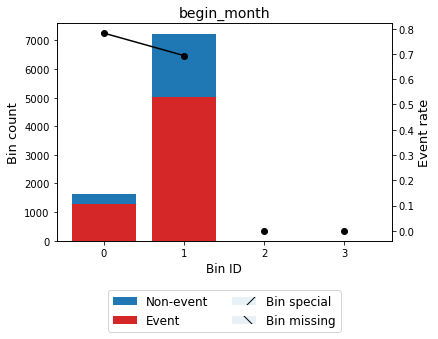

In [90]:
variable = 'begin_month'

x = train_df[variable].values
y = train_df.credit

optb = OptimalBinning(name = variable, dtype = "numerical", solver = "cp", max_n_prebins = 3)
optb.fit(x, y)
    
binning_table = optb.binning_table
v1 = binning_table.build()
    
display(v1)
binning_table.plot(metric = 'event_rate')

In [91]:
# train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_train_transform_bins = optb.transform(train_df['begin_month'], metric="bins")
train_df['begin_month_bin'] = x_train_transform_bins

# test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_test_transform_bins = optb.transform(test_df['begin_month'], metric="bins")
test_df['begin_month_bin'] = x_test_transform_bins

- Categorical Data

In [92]:
from optbinning import OptimalBinning

iv_df = []

for i in categorical_list : 
    variable = i
    x = train_df[variable].values
    y = train_df.credit
    
    optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
    optb.fit(x, y)
    
    binning_table = optb.binning_table
    v1 = binning_table.build()
    
    loop_df = pd.DataFrame({'val' : variable, 'IV' : [v1.loc['Totals', 'IV']]})
    iv_df.append(loop_df)
    
iv_df = pd.concat(iv_df).reset_index(drop = True)
iv_df.sort_values(by = ['IV'], ascending = False)

,val,IV
8,UserCode,5.927274
7,occyp_type,0.013769
3,income_type,0.004890
10,phone,0.003046
5,family_type,0.002624
12,family_size,0.002003
6,house_type,0.001500
1,car,0.001095
11,email,0.000945
0,gender,0.000438


In [93]:
# variable = 'UserCode'

# x = train_df[variable].values
# y = train_df.credit

# optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
# optb.fit(x, y)
    
# binning_table = optb.binning_table
# v1 = binning_table.build()
    
# display(v1)
# binning_table.plot(metric = 'event_rate')

In [94]:
# # train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
# x_train_transform_bins = optb.transform(train_df['UserCode'], metric="bins")
# train_df['UserCode_bin'] = x_train_transform_bins

# # test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
# x_test_transform_bins = optb.transform(test_df['UserCode'], metric="bins")
# test_df['UserCode_bin'] = x_test_transform_bins

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Realty agents, Private service staff, IT staf...",861,0.097156,298,563,0.653891,0.257543,0.006773,0.000844
1,[Core staff],889,0.100316,278,611,0.687289,0.106254,0.001157,0.000145
2,"[Not_retired, Accountants, unemployed, Laborers]",2681,0.302528,787,1894,0.706453,0.015512,0.000073,0.000009
3,"[Sales staff, High skill tech staff, Waiters/b...",3843,0.433649,1069,2774,0.721832,-0.059837,0.001533,0.000192
4,"[Medicine staff, Cleaning staff, HR staff, Sec...",588,0.066351,141,447,0.760204,-0.260069,0.004233,0.000528
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,8862,1.000000,2573,6289,0.709659,,0.013769,0.001717


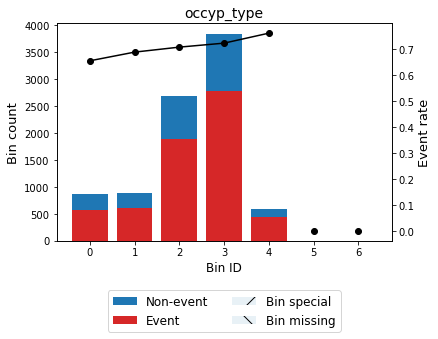

In [95]:
variable = 'occyp_type'

x = train_df[variable].values
y = train_df.credit

optb = OptimalBinning(name = variable, dtype = "categorical", solver = "cp")
optb.fit(x, y)
    
binning_table = optb.binning_table
v1 = binning_table.build()
    
display(v1)
binning_table.plot(metric = 'event_rate')

In [96]:
# train 데이터의 'begin_month' 변수에 대한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_train_transform_bins = optb.transform(train_df['occyp_type'], metric="bins")
train_df['occyp_type_bin'] = x_train_transform_bins

# test 데이터의 'begin_month' 변수에 대해서도 train 데이터와 동일한 최적 구간을 사용하여 파생 변수를 만듭니다.
x_test_transform_bins = optb.transform(test_df['occyp_type'], metric="bins")
test_df['occyp_type_bin'] = x_test_transform_bins

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8862 entries, 0 to 8870
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          8862 non-null   int64  
 1   gender         8862 non-null   object 
 2   car            8862 non-null   object 
 3   reality        8862 non-null   object 
 4   child_num      8862 non-null   int64  
 5   income_total   8862 non-null   float64
 6   income_type    8862 non-null   object 
 7   edu_type       8862 non-null   object 
 8   family_type    8862 non-null   object 
 9   house_type     8862 non-null   object 
 10  DAYS_BIRTH     8862 non-null   int64  
 11  DAYS_EMPLOYED  8862 non-null   int64  
 12  FLAG_MOBIL     8862 non-null   int64  
 13  work_phone     8862 non-null   int64  
 14  phone          8862 non-null   int64  
 15  email          8862 non-null   int64  
 16  occyp_type     8862 non-null   object 
 17  family_size    8862 non-null   float64
 18  begin_month  

In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2218 non-null   int64  
 1   gender         2218 non-null   object 
 2   car            2218 non-null   object 
 3   reality        2218 non-null   object 
 4   child_num      2218 non-null   int64  
 5   income_total   2218 non-null   float64
 6   income_type    2218 non-null   object 
 7   edu_type       2218 non-null   object 
 8   family_type    2218 non-null   object 
 9   house_type     2218 non-null   object 
 10  DAYS_BIRTH     2218 non-null   int64  
 11  DAYS_EMPLOYED  2218 non-null   int64  
 12  FLAG_MOBIL     2218 non-null   int64  
 13  work_phone     2218 non-null   int64  
 14  phone          2218 non-null   int64  
 15  email          2218 non-null   int64  
 16  occyp_type     2218 non-null   object 
 17  family_size    2218 non-null   float64
 18  begin_mo

### Scaling

1) Numerical column, Categorical column 나누기

In [99]:
# 1. dtype으로 나누기
numerical_list = []
categorical_list = []

for col, dtype in train_df.dtypes.items() : 
    if dtype == 'object' : 
        categorical_list.append(col)
    else :
        numerical_list.append(col)

In [100]:
# 2. 수기로 추가하기 (이미 숫자로 인코딩되어 표현된 경우)
add_categoric = ['work_phone', 'phone', 'email', 'family_size']

for i in add_categoric : 
    numerical_list.remove(i)
    
for i in add_categoric : 
    categorical_list.append(i)

In [101]:
print(numerical_list)
print(categorical_list)

['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'credit', 'age', 'before_EMPLOYED', 'income_total_befofeEMP_ratio', 'before_EMPLOYED_m', 'before_EMPLOYED_w', 'DAYS_BIRTH_m', 'DAYS_BIRTH_w', 'Age_group', 'EMPLOYED', 'DAYS_EMPLOYED_m', 'DAYS_EMPLOYED_w', 'ability', 'income_mean', 'income_pow', 'diff_fam_child', 'begin_month_y', 'begin_month_w', 'begin_month_d', 'cluster']
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode', 'begin_month_bin', 'occyp_type_bin', 'work_phone', 'phone', 'email', 'family_size']


2) income_total, income_pow 컬럼은 로그변환 수행

In [102]:
train_df['income_total'] = np.log1p(1+train_df['income_total'])
test_df['income_total'] = np.log1p(1+test_df['income_total'])

train_df['income_pow'] = np.log1p(1+train_df['income_pow'])
test_df['income_pow'] = np.log1p(1+test_df['income_pow'])

3) Categorical data에 대해 Original Encoder 수행

In [103]:
encoder = OrdinalEncoder(categorical_list)
train_df[categorical_list] = encoder.fit_transform(train_df[categorical_list], train_df['credit'])
test_df[categorical_list] = encoder.transform(test_df[categorical_list])

In [104]:
train_df['UserCode'] = train_df['UserCode'].astype('int64')
test_df['UserCode'] = test_df['UserCode'].astype('int64')

4) Standard Scaler

In [105]:
numerical_list.remove('income_total')
numerical_list.remove('credit')

scaler = StandardScaler()
train_df[numerical_list] = scaler.fit_transform(train_df[numerical_list])
test_df[numerical_list] = scaler.transform(test_df[numerical_list])

### 다중공선성 분석

1) VIF 분석

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# numerical_list에 저장된 컬럼에 대해 데이터프레임 생성
numerical_df = train_df[numerical_list]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_df.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_df.values, i) for i in range(len(numerical_df.columns))]

In [107]:
vif_data[vif_data["VIF"] >= 10]

,feature,VIF
1,DAYS_BIRTH,inf
2,DAYS_EMPLOYED,inf
3,begin_month,inf
4,age,1875.605558
5,before_EMPLOYED,inf
6,income_total_befofeEMP_ratio,11.142618
11,Age_group,18.611531
12,EMPLOYED,789.357931
15,ability,14.876755
19,begin_month_y,25.243399


In [108]:
columns_to_drop = ['begin_month_d', 'begin_month_w', 'begin_month_y', 'age', 'before_EMPLOYED',
                    'EMPLOYED', 'Age_group', 'income_total_befofeEMP_ratio']
for i in columns_to_drop : 
    numerical_list.remove(i)

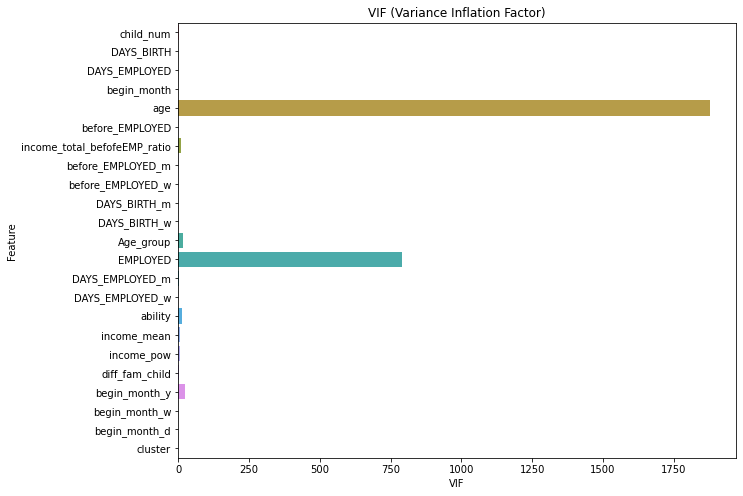

In [109]:
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x="VIF", y="feature", data=vif_data)
plt.title("VIF (Variance Inflation Factor)")
plt.xlabel("VIF")
plt.ylabel("Feature")
plt.show()

In [110]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

In [111]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8862 entries, 0 to 8870
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             8862 non-null   int32  
 1   car                8862 non-null   int32  
 2   reality            8862 non-null   int32  
 3   child_num          8862 non-null   float64
 4   income_total       8862 non-null   float64
 5   income_type        8862 non-null   int32  
 6   edu_type           8862 non-null   int32  
 7   family_type        8862 non-null   int32  
 8   house_type         8862 non-null   int32  
 9   DAYS_BIRTH         8862 non-null   float64
 10  DAYS_EMPLOYED      8862 non-null   float64
 11  work_phone         8862 non-null   int64  
 12  phone              8862 non-null   int64  
 13  email              8862 non-null   int64  
 14  occyp_type         8862 non-null   int32  
 15  family_size        8862 non-null   float64
 16  begin_month        8862 non-n

2) 상관관계 분석

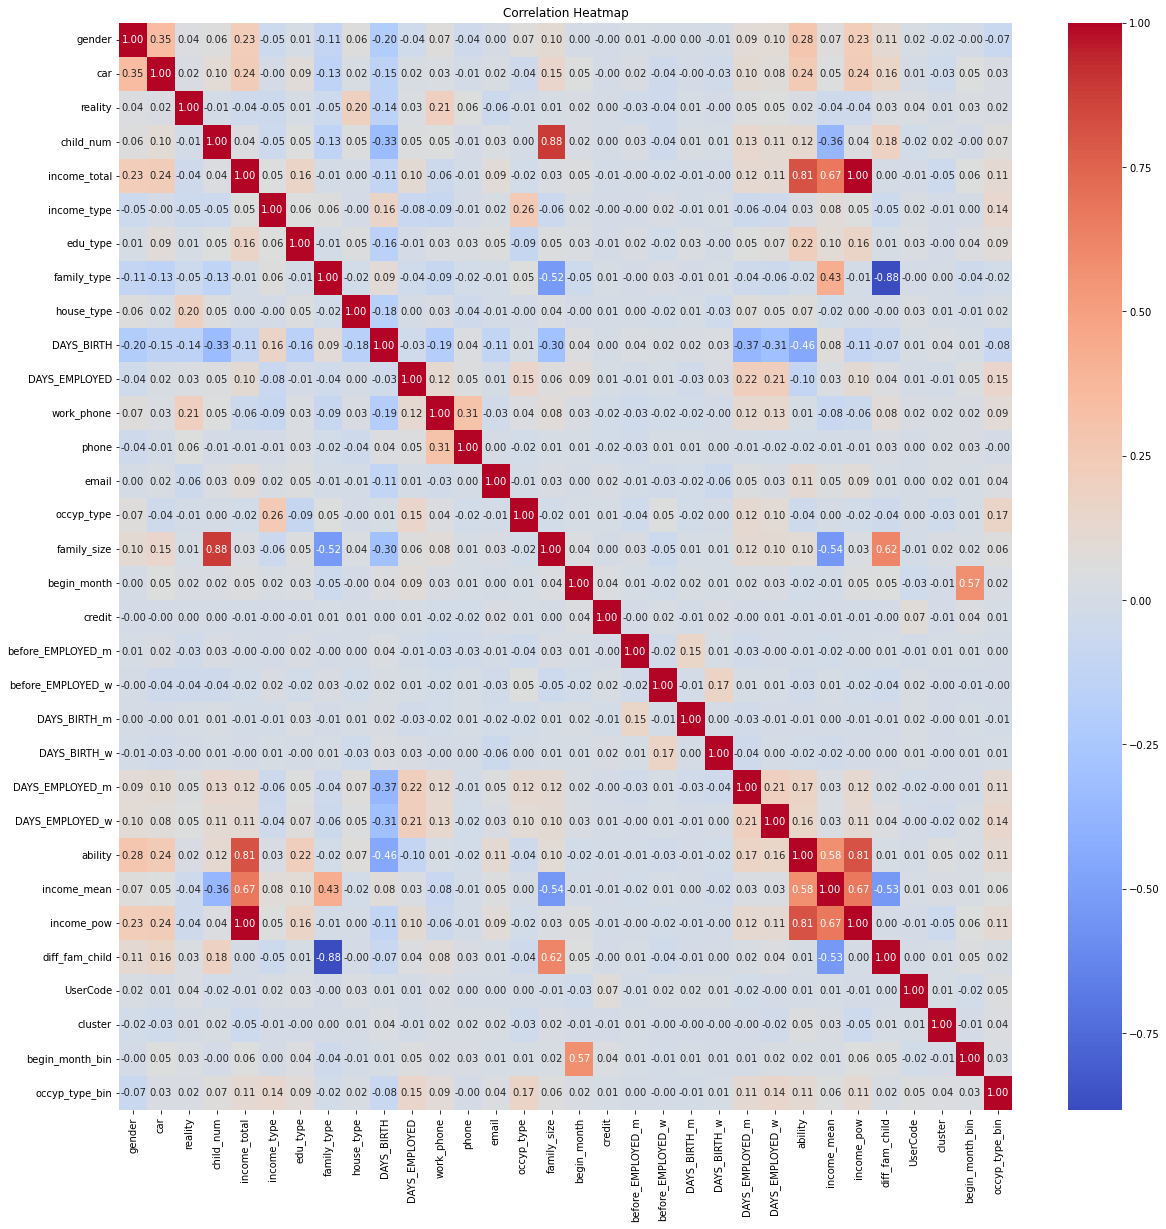

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임의 상관관계 구하기
correlation_matrix = train_df.corr()

# heatmap 시각화
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [113]:
# correlation_matrix에서 0.7 이상인 상관관계를 가진 컬럼 쌍 찾기
high_correlation_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            colname = correlation_matrix.columns[i]
            high_correlation_columns.add(colname)
            colname = correlation_matrix.columns[j]
            high_correlation_columns.add(colname)

# 상관관계가 0.7 이상인 컬럼들 출력
display("상관관계가 0.7 이상인 컬럼들:", high_correlation_columns)

'상관관계가 0.7 이상인 컬럼들:'

{'ability',
 'child_num',
 'diff_fam_child',
 'family_size',
 'family_type',
 'income_pow',
 'income_total'}

3) 컬럼 제거

In [114]:
columns_to_drop = ['ability', 'income_total', 'child_num']

In [115]:
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

### Modeling

1) 학습, 테스트 데이터셋 재정의

In [116]:
y_train = train_df['credit']
x_train = train_df.drop('credit', axis=1)
x_test = test_df.drop('credit', axis=1)
y_test = test_df['credit']

In [117]:
# x_train = x_train.drop(["UserCode"], axis=1)
# x_test = x_test.drop(["UserCode"], axis=1)

In [118]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8862 entries, 0 to 8870
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             8862 non-null   int32  
 1   car                8862 non-null   int32  
 2   reality            8862 non-null   int32  
 3   income_type        8862 non-null   int32  
 4   edu_type           8862 non-null   int32  
 5   family_type        8862 non-null   int32  
 6   house_type         8862 non-null   int32  
 7   DAYS_BIRTH         8862 non-null   float64
 8   DAYS_EMPLOYED      8862 non-null   float64
 9   work_phone         8862 non-null   int64  
 10  phone              8862 non-null   int64  
 11  email              8862 non-null   int64  
 12  occyp_type         8862 non-null   int32  
 13  family_size        8862 non-null   float64
 14  begin_month        8862 non-null   float64
 15  before_EMPLOYED_m  8862 non-null   float64
 16  before_EMPLOYED_w  8862 non-n

In [119]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2218 entries, 0 to 2217
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2218 non-null   int32  
 1   car                2218 non-null   int32  
 2   reality            2218 non-null   int32  
 3   income_type        2218 non-null   int32  
 4   edu_type           2218 non-null   int32  
 5   family_type        2218 non-null   int32  
 6   house_type         2218 non-null   int32  
 7   DAYS_BIRTH         2218 non-null   float64
 8   DAYS_EMPLOYED      2218 non-null   float64
 9   work_phone         2218 non-null   int64  
 10  phone              2218 non-null   int64  
 11  email              2218 non-null   int64  
 12  occyp_type         2218 non-null   int32  
 13  family_size        2218 non-null   float64
 14  begin_month        2218 non-null   float64
 15  before_EMPLOYED_m  2218 non-null   float64
 16  before_EMPLOYED_w  2218 non-n

In [120]:
def plot_feature_importance(importance,names,model_type):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

### GridSearchCV & CatBoost Classifier

In [121]:
n_est = 2000
seed = 42
n_fold = 5
n_class = 3

In [122]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from catboost import Pool
import numpy as np
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

# CatBoost 모델 객체 생성
model_cat = CatBoostClassifier()

param_grid = {
    'l2_leaf_reg': [1, 2],
    'iterations': [200],    
    'learning_rate': [0.1],
    'depth': [4, 5, 6],
    'random_strength': [1],
}

cat_cols = ['income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'UserCode']

# GridSearchCV 객체 생성
grid_search_cat = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss',refit = True, verbose = 100)

# 그리드서치를 사용하여 모델 학습
grid_search_cat.fit(x_train, y_train, cat_features=cat_cols)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_cat.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_cat_proba = grid_search_cat.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_cat_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START depth=4, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1
0:	learn: 1.0685125	total: 150ms	remaining: 29.9s
1:	learn: 1.0442239	total: 165ms	remaining: 16.3s
2:	learn: 1.0274465	total: 177ms	remaining: 11.6s
3:	learn: 1.0113082	total: 192ms	remaining: 9.39s
4:	learn: 0.9981053	total: 200ms	remaining: 7.8s
5:	learn: 0.9880308	total: 208ms	remaining: 6.71s
6:	learn: 0.9677911	total: 222ms	remaining: 6.13s
7:	learn: 0.9493725	total: 236ms	remaining: 5.67s
8:	learn: 0.9360824	total: 251ms	remaining: 5.32s
9:	learn: 0.9277079	total: 262ms	remaining: 4.97s
10:	learn: 0.9159821	total: 276ms	remaining: 4.74s
11:	learn: 0.9085091	total: 291ms	remaining: 4.55s
12:	learn: 0.9004951	total: 306ms	remaining: 4.39s
13:	learn: 0.8957261	total: 316ms	remaining: 4.2s
14:	learn: 0.8896556	total: 330ms	remaining: 4.07s
15:	learn: 0.8859116	total: 345ms	remaining: 3.97s
16:	learn: 0.8826202	total: 360ms	remai

166:	learn: 0.8045304	total: 2.78s	remaining: 549ms
167:	learn: 0.8043619	total: 2.79s	remaining: 532ms
168:	learn: 0.8040667	total: 2.81s	remaining: 515ms
169:	learn: 0.8038570	total: 2.83s	remaining: 499ms
170:	learn: 0.8038211	total: 2.84s	remaining: 482ms
171:	learn: 0.8033525	total: 2.86s	remaining: 465ms
172:	learn: 0.8029121	total: 2.87s	remaining: 448ms
173:	learn: 0.8027235	total: 2.89s	remaining: 432ms
174:	learn: 0.8024662	total: 2.9s	remaining: 415ms
175:	learn: 0.8023674	total: 2.92s	remaining: 398ms
176:	learn: 0.8021073	total: 2.93s	remaining: 381ms
177:	learn: 0.8017132	total: 2.95s	remaining: 365ms
178:	learn: 0.8014508	total: 2.97s	remaining: 348ms
179:	learn: 0.8011939	total: 2.98s	remaining: 331ms
180:	learn: 0.8011152	total: 3s	remaining: 315ms
181:	learn: 0.8008669	total: 3.01s	remaining: 298ms
182:	learn: 0.8003303	total: 3.03s	remaining: 281ms
183:	learn: 0.8002254	total: 3.04s	remaining: 265ms
184:	learn: 0.8001799	total: 3.06s	remaining: 248ms
185:	learn: 0.79

127:	learn: 0.8191781	total: 2.02s	remaining: 1.14s
128:	learn: 0.8188596	total: 2.04s	remaining: 1.12s
129:	learn: 0.8185729	total: 2.06s	remaining: 1.11s
130:	learn: 0.8181608	total: 2.08s	remaining: 1.09s
131:	learn: 0.8177195	total: 2.1s	remaining: 1.08s
132:	learn: 0.8176269	total: 2.11s	remaining: 1.06s
133:	learn: 0.8173374	total: 2.13s	remaining: 1.05s
134:	learn: 0.8170420	total: 2.15s	remaining: 1.03s
135:	learn: 0.8167453	total: 2.16s	remaining: 1.02s
136:	learn: 0.8163851	total: 2.18s	remaining: 1s
137:	learn: 0.8162175	total: 2.19s	remaining: 985ms
138:	learn: 0.8157813	total: 2.21s	remaining: 970ms
139:	learn: 0.8152949	total: 2.23s	remaining: 954ms
140:	learn: 0.8150102	total: 2.24s	remaining: 938ms
141:	learn: 0.8149018	total: 2.26s	remaining: 922ms
142:	learn: 0.8144785	total: 2.27s	remaining: 906ms
143:	learn: 0.8138513	total: 2.29s	remaining: 890ms
144:	learn: 0.8136536	total: 2.3s	remaining: 874ms
145:	learn: 0.8134639	total: 2.32s	remaining: 858ms
146:	learn: 0.813

84:	learn: 0.8334279	total: 1.34s	remaining: 1.82s
85:	learn: 0.8329658	total: 1.36s	remaining: 1.8s
86:	learn: 0.8325854	total: 1.38s	remaining: 1.79s
87:	learn: 0.8321672	total: 1.39s	remaining: 1.77s
88:	learn: 0.8317887	total: 1.41s	remaining: 1.76s
89:	learn: 0.8316167	total: 1.42s	remaining: 1.74s
90:	learn: 0.8314203	total: 1.44s	remaining: 1.73s
91:	learn: 0.8305092	total: 1.46s	remaining: 1.71s
92:	learn: 0.8300794	total: 1.47s	remaining: 1.69s
93:	learn: 0.8299355	total: 1.49s	remaining: 1.68s
94:	learn: 0.8296801	total: 1.51s	remaining: 1.67s
95:	learn: 0.8291871	total: 1.52s	remaining: 1.65s
96:	learn: 0.8284381	total: 1.55s	remaining: 1.65s
97:	learn: 0.8281560	total: 1.57s	remaining: 1.63s
98:	learn: 0.8277827	total: 1.59s	remaining: 1.63s
99:	learn: 0.8274902	total: 1.61s	remaining: 1.61s
100:	learn: 0.8271938	total: 1.62s	remaining: 1.59s
101:	learn: 0.8268478	total: 1.64s	remaining: 1.57s
102:	learn: 0.8265310	total: 1.66s	remaining: 1.56s
103:	learn: 0.8260355	total: 

42:	learn: 0.8468926	total: 641ms	remaining: 2.34s
43:	learn: 0.8459255	total: 656ms	remaining: 2.33s
44:	learn: 0.8450709	total: 671ms	remaining: 2.31s
45:	learn: 0.8445101	total: 687ms	remaining: 2.3s
46:	learn: 0.8443571	total: 703ms	remaining: 2.29s
47:	learn: 0.8439588	total: 717ms	remaining: 2.27s
48:	learn: 0.8432769	total: 731ms	remaining: 2.25s
49:	learn: 0.8428718	total: 747ms	remaining: 2.24s
50:	learn: 0.8427330	total: 762ms	remaining: 2.23s
51:	learn: 0.8420564	total: 777ms	remaining: 2.21s
52:	learn: 0.8417232	total: 792ms	remaining: 2.2s
53:	learn: 0.8413255	total: 809ms	remaining: 2.19s
54:	learn: 0.8410730	total: 825ms	remaining: 2.17s
55:	learn: 0.8406735	total: 841ms	remaining: 2.16s
56:	learn: 0.8400759	total: 856ms	remaining: 2.15s
57:	learn: 0.8399355	total: 872ms	remaining: 2.13s
58:	learn: 0.8393229	total: 887ms	remaining: 2.12s
59:	learn: 0.8386962	total: 902ms	remaining: 2.1s
60:	learn: 0.8383802	total: 917ms	remaining: 2.09s
61:	learn: 0.8380839	total: 932ms	

1:	learn: 1.0468583	total: 30.4ms	remaining: 3.01s
2:	learn: 1.0278218	total: 46.3ms	remaining: 3.04s
3:	learn: 1.0116589	total: 61.9ms	remaining: 3.03s
4:	learn: 1.0004718	total: 77.2ms	remaining: 3.01s
5:	learn: 0.9895045	total: 93.1ms	remaining: 3.01s
6:	learn: 0.9820853	total: 97.9ms	remaining: 2.7s
7:	learn: 0.9590791	total: 113ms	remaining: 2.71s
8:	learn: 0.9410503	total: 127ms	remaining: 2.69s
9:	learn: 0.9252669	total: 141ms	remaining: 2.69s
10:	learn: 0.9148493	total: 156ms	remaining: 2.68s
11:	learn: 0.9058673	total: 170ms	remaining: 2.66s
12:	learn: 0.9002684	total: 178ms	remaining: 2.55s
13:	learn: 0.8920317	total: 191ms	remaining: 2.54s
14:	learn: 0.8867028	total: 206ms	remaining: 2.54s
15:	learn: 0.8822484	total: 221ms	remaining: 2.54s
16:	learn: 0.8769567	total: 236ms	remaining: 2.54s
17:	learn: 0.8741009	total: 250ms	remaining: 2.53s
18:	learn: 0.8698526	total: 264ms	remaining: 2.52s
19:	learn: 0.8679562	total: 279ms	remaining: 2.51s
20:	learn: 0.8663230	total: 318ms	r

163:	learn: 0.8003635	total: 2.61s	remaining: 573ms
164:	learn: 0.8001511	total: 2.63s	remaining: 557ms
165:	learn: 0.7998545	total: 2.64s	remaining: 541ms
166:	learn: 0.7997127	total: 2.66s	remaining: 525ms
167:	learn: 0.7994221	total: 2.67s	remaining: 509ms
168:	learn: 0.7993007	total: 2.69s	remaining: 494ms
169:	learn: 0.7991507	total: 2.71s	remaining: 478ms
170:	learn: 0.7989161	total: 2.73s	remaining: 462ms
171:	learn: 0.7986121	total: 2.74s	remaining: 446ms
172:	learn: 0.7983661	total: 2.76s	remaining: 431ms
173:	learn: 0.7982242	total: 2.77s	remaining: 415ms
174:	learn: 0.7979023	total: 2.79s	remaining: 399ms
175:	learn: 0.7975843	total: 2.81s	remaining: 383ms
176:	learn: 0.7972983	total: 2.82s	remaining: 367ms
177:	learn: 0.7969298	total: 2.84s	remaining: 351ms
178:	learn: 0.7965189	total: 2.87s	remaining: 337ms
179:	learn: 0.7964218	total: 2.88s	remaining: 321ms
180:	learn: 0.7960950	total: 2.9s	remaining: 305ms
181:	learn: 0.7957262	total: 2.92s	remaining: 289ms
182:	learn: 0

123:	learn: 0.8185513	total: 1.92s	remaining: 1.18s
124:	learn: 0.8182385	total: 1.94s	remaining: 1.16s
125:	learn: 0.8181485	total: 1.95s	remaining: 1.15s
126:	learn: 0.8179221	total: 1.97s	remaining: 1.13s
127:	learn: 0.8173581	total: 1.99s	remaining: 1.12s
128:	learn: 0.8171467	total: 2s	remaining: 1.1s
129:	learn: 0.8166635	total: 2.02s	remaining: 1.09s
130:	learn: 0.8163458	total: 2.03s	remaining: 1.07s
131:	learn: 0.8157935	total: 2.05s	remaining: 1.05s
132:	learn: 0.8155283	total: 2.06s	remaining: 1.04s
133:	learn: 0.8154309	total: 2.08s	remaining: 1.02s
134:	learn: 0.8153179	total: 2.1s	remaining: 1.01s
135:	learn: 0.8152018	total: 2.11s	remaining: 994ms
136:	learn: 0.8149587	total: 2.13s	remaining: 978ms
137:	learn: 0.8146422	total: 2.14s	remaining: 963ms
138:	learn: 0.8140243	total: 2.16s	remaining: 947ms
139:	learn: 0.8139282	total: 2.17s	remaining: 931ms
140:	learn: 0.8135620	total: 2.19s	remaining: 916ms
141:	learn: 0.8132204	total: 2.2s	remaining: 900ms
142:	learn: 0.8127

86:	learn: 0.8332951	total: 1.32s	remaining: 1.72s
87:	learn: 0.8328499	total: 1.34s	remaining: 1.71s
88:	learn: 0.8327082	total: 1.36s	remaining: 1.69s
89:	learn: 0.8325094	total: 1.37s	remaining: 1.68s
90:	learn: 0.8321270	total: 1.39s	remaining: 1.66s
91:	learn: 0.8320100	total: 1.41s	remaining: 1.66s
92:	learn: 0.8318900	total: 1.43s	remaining: 1.65s
93:	learn: 0.8315912	total: 1.45s	remaining: 1.63s
94:	learn: 0.8313961	total: 1.47s	remaining: 1.62s
95:	learn: 0.8309226	total: 1.48s	remaining: 1.6s
96:	learn: 0.8307592	total: 1.5s	remaining: 1.59s
97:	learn: 0.8305150	total: 1.52s	remaining: 1.58s
98:	learn: 0.8302138	total: 1.53s	remaining: 1.56s
99:	learn: 0.8298807	total: 1.55s	remaining: 1.55s
100:	learn: 0.8296071	total: 1.57s	remaining: 1.53s
101:	learn: 0.8293792	total: 1.58s	remaining: 1.52s
102:	learn: 0.8290400	total: 1.6s	remaining: 1.5s
103:	learn: 0.8284928	total: 1.61s	remaining: 1.49s
104:	learn: 0.8284426	total: 1.63s	remaining: 1.47s
105:	learn: 0.8281097	total: 1

44:	learn: 0.8522210	total: 695ms	remaining: 2.39s
45:	learn: 0.8508479	total: 710ms	remaining: 2.38s
46:	learn: 0.8504546	total: 725ms	remaining: 2.36s
47:	learn: 0.8501902	total: 740ms	remaining: 2.34s
48:	learn: 0.8491976	total: 756ms	remaining: 2.33s
49:	learn: 0.8482031	total: 771ms	remaining: 2.31s
50:	learn: 0.8480725	total: 779ms	remaining: 2.28s
51:	learn: 0.8464588	total: 794ms	remaining: 2.26s
52:	learn: 0.8462246	total: 809ms	remaining: 2.24s
53:	learn: 0.8453976	total: 825ms	remaining: 2.23s
54:	learn: 0.8452392	total: 840ms	remaining: 2.21s
55:	learn: 0.8451628	total: 857ms	remaining: 2.2s
56:	learn: 0.8444713	total: 873ms	remaining: 2.19s
57:	learn: 0.8437047	total: 890ms	remaining: 2.18s
58:	learn: 0.8423082	total: 907ms	remaining: 2.17s
59:	learn: 0.8418243	total: 923ms	remaining: 2.15s
60:	learn: 0.8412386	total: 939ms	remaining: 2.14s
61:	learn: 0.8410396	total: 955ms	remaining: 2.12s
62:	learn: 0.8406419	total: 970ms	remaining: 2.11s
63:	learn: 0.8403056	total: 986m

4:	learn: 0.9999568	total: 77.6ms	remaining: 3.02s
5:	learn: 0.9887895	total: 94.3ms	remaining: 3.05s
6:	learn: 0.9813242	total: 99.6ms	remaining: 2.75s
7:	learn: 0.9601607	total: 116ms	remaining: 2.79s
8:	learn: 0.9427262	total: 131ms	remaining: 2.77s
9:	learn: 0.9306589	total: 152ms	remaining: 2.88s
10:	learn: 0.9207014	total: 167ms	remaining: 2.87s
11:	learn: 0.9144514	total: 175ms	remaining: 2.73s
12:	learn: 0.9076711	total: 188ms	remaining: 2.71s
13:	learn: 0.8999289	total: 203ms	remaining: 2.7s
14:	learn: 0.8951383	total: 218ms	remaining: 2.69s
15:	learn: 0.8906345	total: 233ms	remaining: 2.68s
16:	learn: 0.8858486	total: 248ms	remaining: 2.67s
17:	learn: 0.8825650	total: 262ms	remaining: 2.65s
18:	learn: 0.8797270	total: 277ms	remaining: 2.64s
19:	learn: 0.8772761	total: 291ms	remaining: 2.62s
20:	learn: 0.8735467	total: 306ms	remaining: 2.61s
21:	learn: 0.8705865	total: 322ms	remaining: 2.6s
22:	learn: 0.8689611	total: 337ms	remaining: 2.59s
23:	learn: 0.8663736	total: 350ms	re

168:	learn: 0.8056987	total: 2.69s	remaining: 493ms
169:	learn: 0.8055544	total: 2.7s	remaining: 477ms
170:	learn: 0.8054573	total: 2.72s	remaining: 461ms
171:	learn: 0.8052976	total: 2.74s	remaining: 445ms
172:	learn: 0.8052519	total: 2.75s	remaining: 430ms
173:	learn: 0.8051579	total: 2.77s	remaining: 414ms
174:	learn: 0.8048906	total: 2.78s	remaining: 398ms
175:	learn: 0.8047661	total: 2.8s	remaining: 382ms
176:	learn: 0.8045322	total: 2.81s	remaining: 366ms
177:	learn: 0.8041750	total: 2.83s	remaining: 350ms
178:	learn: 0.8040094	total: 2.84s	remaining: 334ms
179:	learn: 0.8036292	total: 2.86s	remaining: 318ms
180:	learn: 0.8032448	total: 2.88s	remaining: 302ms
181:	learn: 0.8030751	total: 2.89s	remaining: 286ms
182:	learn: 0.8027145	total: 2.91s	remaining: 270ms
183:	learn: 0.8024712	total: 2.92s	remaining: 254ms
184:	learn: 0.8021619	total: 2.94s	remaining: 238ms
185:	learn: 0.8019060	total: 2.95s	remaining: 222ms
186:	learn: 0.8017080	total: 2.97s	remaining: 206ms
187:	learn: 0.

128:	learn: 0.8107466	total: 2.07s	remaining: 1.14s
129:	learn: 0.8105283	total: 2.08s	remaining: 1.12s
130:	learn: 0.8102478	total: 2.1s	remaining: 1.11s
131:	learn: 0.8101472	total: 2.12s	remaining: 1.09s
132:	learn: 0.8100232	total: 2.13s	remaining: 1.07s
133:	learn: 0.8096691	total: 2.15s	remaining: 1.06s
134:	learn: 0.8095202	total: 2.16s	remaining: 1.04s
135:	learn: 0.8090626	total: 2.18s	remaining: 1.02s
136:	learn: 0.8088604	total: 2.19s	remaining: 1.01s
137:	learn: 0.8086044	total: 2.21s	remaining: 993ms
138:	learn: 0.8082908	total: 2.23s	remaining: 977ms
139:	learn: 0.8081448	total: 2.24s	remaining: 961ms
140:	learn: 0.8079901	total: 2.26s	remaining: 945ms
141:	learn: 0.8078254	total: 2.28s	remaining: 930ms
142:	learn: 0.8075218	total: 2.29s	remaining: 914ms
143:	learn: 0.8071483	total: 2.31s	remaining: 898ms
144:	learn: 0.8067725	total: 2.33s	remaining: 882ms
145:	learn: 0.8064398	total: 2.34s	remaining: 866ms
146:	learn: 0.8058870	total: 2.36s	remaining: 850ms
147:	learn: 0

90:	learn: 0.8154074	total: 1.83s	remaining: 2.19s
91:	learn: 0.8148233	total: 1.85s	remaining: 2.17s
92:	learn: 0.8143559	total: 1.87s	remaining: 2.15s
93:	learn: 0.8138312	total: 1.89s	remaining: 2.13s
94:	learn: 0.8133948	total: 1.91s	remaining: 2.11s
95:	learn: 0.8131502	total: 1.93s	remaining: 2.09s
96:	learn: 0.8125536	total: 1.95s	remaining: 2.07s
97:	learn: 0.8121726	total: 1.97s	remaining: 2.06s
98:	learn: 0.8114879	total: 2s	remaining: 2.04s
99:	learn: 0.8106787	total: 2.02s	remaining: 2.02s
100:	learn: 0.8100805	total: 2.04s	remaining: 2s
101:	learn: 0.8100169	total: 2.06s	remaining: 1.98s
102:	learn: 0.8097348	total: 2.08s	remaining: 1.96s
103:	learn: 0.8093304	total: 2.1s	remaining: 1.94s
104:	learn: 0.8087788	total: 2.12s	remaining: 1.92s
105:	learn: 0.8083055	total: 2.14s	remaining: 1.9s
106:	learn: 0.8079182	total: 2.17s	remaining: 1.89s
107:	learn: 0.8072482	total: 2.19s	remaining: 1.87s
108:	learn: 0.8068592	total: 2.21s	remaining: 1.85s
109:	learn: 0.8065130	total: 2

51:	learn: 0.8415695	total: 1.05s	remaining: 2.99s
52:	learn: 0.8408341	total: 1.07s	remaining: 2.98s
53:	learn: 0.8407051	total: 1.09s	remaining: 2.96s
54:	learn: 0.8401231	total: 1.11s	remaining: 2.94s
55:	learn: 0.8395581	total: 1.14s	remaining: 2.92s
56:	learn: 0.8391746	total: 1.16s	remaining: 2.9s
57:	learn: 0.8387613	total: 1.17s	remaining: 2.88s
58:	learn: 0.8381990	total: 1.2s	remaining: 2.87s
59:	learn: 0.8375031	total: 1.22s	remaining: 2.85s
60:	learn: 0.8369367	total: 1.24s	remaining: 2.83s
61:	learn: 0.8366712	total: 1.26s	remaining: 2.81s
62:	learn: 0.8362279	total: 1.28s	remaining: 2.79s
63:	learn: 0.8359487	total: 1.3s	remaining: 2.77s
64:	learn: 0.8356869	total: 1.32s	remaining: 2.75s
65:	learn: 0.8352772	total: 1.34s	remaining: 2.73s
66:	learn: 0.8348751	total: 1.36s	remaining: 2.71s
67:	learn: 0.8345662	total: 1.38s	remaining: 2.69s
68:	learn: 0.8341728	total: 1.4s	remaining: 2.67s
69:	learn: 0.8337556	total: 1.43s	remaining: 2.65s
70:	learn: 0.8335126	total: 1.45s	r

9:	learn: 0.9328951	total: 175ms	remaining: 3.33s
10:	learn: 0.9208651	total: 195ms	remaining: 3.34s
11:	learn: 0.9103136	total: 213ms	remaining: 3.34s
12:	learn: 0.9040647	total: 233ms	remaining: 3.35s
13:	learn: 0.8978159	total: 252ms	remaining: 3.35s
14:	learn: 0.8935301	total: 272ms	remaining: 3.35s
15:	learn: 0.8880919	total: 292ms	remaining: 3.36s
16:	learn: 0.8852304	total: 304ms	remaining: 3.27s
17:	learn: 0.8815282	total: 322ms	remaining: 3.25s
18:	learn: 0.8770629	total: 342ms	remaining: 3.25s
19:	learn: 0.8750326	total: 361ms	remaining: 3.25s
20:	learn: 0.8715186	total: 382ms	remaining: 3.26s
21:	learn: 0.8696599	total: 404ms	remaining: 3.27s
22:	learn: 0.8678179	total: 426ms	remaining: 3.27s
23:	learn: 0.8664868	total: 449ms	remaining: 3.29s
24:	learn: 0.8647930	total: 461ms	remaining: 3.23s
25:	learn: 0.8628103	total: 480ms	remaining: 3.21s
26:	learn: 0.8611339	total: 500ms	remaining: 3.2s
27:	learn: 0.8604251	total: 519ms	remaining: 3.19s
28:	learn: 0.8598678	total: 542ms

172:	learn: 0.7765132	total: 3.56s	remaining: 556ms
173:	learn: 0.7760134	total: 3.58s	remaining: 536ms
174:	learn: 0.7752225	total: 3.6s	remaining: 515ms
175:	learn: 0.7743712	total: 3.63s	remaining: 494ms
176:	learn: 0.7741297	total: 3.65s	remaining: 474ms
177:	learn: 0.7736126	total: 3.67s	remaining: 453ms
178:	learn: 0.7734590	total: 3.69s	remaining: 433ms
179:	learn: 0.7727437	total: 3.71s	remaining: 412ms
180:	learn: 0.7719733	total: 3.73s	remaining: 391ms
181:	learn: 0.7715807	total: 3.75s	remaining: 371ms
182:	learn: 0.7711472	total: 3.77s	remaining: 350ms
183:	learn: 0.7707832	total: 3.79s	remaining: 330ms
184:	learn: 0.7699091	total: 3.81s	remaining: 309ms
185:	learn: 0.7693112	total: 3.83s	remaining: 288ms
186:	learn: 0.7688834	total: 3.85s	remaining: 268ms
187:	learn: 0.7681987	total: 3.87s	remaining: 247ms
188:	learn: 0.7679097	total: 3.89s	remaining: 227ms
189:	learn: 0.7674100	total: 3.91s	remaining: 206ms
190:	learn: 0.7667379	total: 3.93s	remaining: 185ms
191:	learn: 0

134:	learn: 0.7923098	total: 2.78s	remaining: 1.34s
135:	learn: 0.7919134	total: 2.8s	remaining: 1.32s
136:	learn: 0.7912001	total: 2.82s	remaining: 1.3s
137:	learn: 0.7905432	total: 2.84s	remaining: 1.28s
138:	learn: 0.7902236	total: 2.86s	remaining: 1.25s
139:	learn: 0.7895749	total: 2.89s	remaining: 1.24s
140:	learn: 0.7890770	total: 2.91s	remaining: 1.22s
141:	learn: 0.7887270	total: 2.93s	remaining: 1.2s
142:	learn: 0.7884458	total: 2.95s	remaining: 1.18s
143:	learn: 0.7875815	total: 2.97s	remaining: 1.16s
144:	learn: 0.7869632	total: 2.99s	remaining: 1.13s
145:	learn: 0.7866413	total: 3.01s	remaining: 1.11s
146:	learn: 0.7861612	total: 3.03s	remaining: 1.09s
147:	learn: 0.7855663	total: 3.05s	remaining: 1.07s
148:	learn: 0.7848573	total: 3.08s	remaining: 1.05s
149:	learn: 0.7842416	total: 3.1s	remaining: 1.03s
150:	learn: 0.7840094	total: 3.12s	remaining: 1.01s
151:	learn: 0.7838201	total: 3.14s	remaining: 992ms
152:	learn: 0.7834598	total: 3.17s	remaining: 972ms
153:	learn: 0.78

95:	learn: 0.8072530	total: 1.9s	remaining: 2.05s
96:	learn: 0.8065692	total: 1.92s	remaining: 2.03s
97:	learn: 0.8054372	total: 1.94s	remaining: 2.02s
98:	learn: 0.8052626	total: 1.96s	remaining: 2s
99:	learn: 0.8045934	total: 1.98s	remaining: 1.98s
100:	learn: 0.8041678	total: 2s	remaining: 1.96s
101:	learn: 0.8037152	total: 2.02s	remaining: 1.94s
102:	learn: 0.8032282	total: 2.04s	remaining: 1.92s
103:	learn: 0.8027550	total: 2.06s	remaining: 1.9s
104:	learn: 0.8020736	total: 2.08s	remaining: 1.88s
105:	learn: 0.8013039	total: 2.1s	remaining: 1.86s
106:	learn: 0.8007465	total: 2.12s	remaining: 1.84s
107:	learn: 0.8004201	total: 2.14s	remaining: 1.82s
108:	learn: 0.8001808	total: 2.16s	remaining: 1.8s
109:	learn: 0.7996145	total: 2.18s	remaining: 1.79s
110:	learn: 0.7988709	total: 2.21s	remaining: 1.77s
111:	learn: 0.7980936	total: 2.23s	remaining: 1.75s
112:	learn: 0.7974332	total: 2.25s	remaining: 1.73s
113:	learn: 0.7970388	total: 2.27s	remaining: 1.71s
114:	learn: 0.7964716	total

57:	learn: 0.8321431	total: 1.24s	remaining: 3.04s
58:	learn: 0.8319160	total: 1.26s	remaining: 3.02s
59:	learn: 0.8313837	total: 1.28s	remaining: 2.99s
60:	learn: 0.8312105	total: 1.3s	remaining: 2.97s
61:	learn: 0.8307962	total: 1.32s	remaining: 2.95s
62:	learn: 0.8306170	total: 1.35s	remaining: 2.93s
63:	learn: 0.8302382	total: 1.37s	remaining: 2.9s
64:	learn: 0.8300395	total: 1.39s	remaining: 2.88s
65:	learn: 0.8298809	total: 1.41s	remaining: 2.86s
66:	learn: 0.8297736	total: 1.43s	remaining: 2.84s
67:	learn: 0.8295958	total: 1.46s	remaining: 2.83s
68:	learn: 0.8292308	total: 1.48s	remaining: 2.81s
69:	learn: 0.8285466	total: 1.5s	remaining: 2.78s
70:	learn: 0.8279574	total: 1.52s	remaining: 2.77s
71:	learn: 0.8276466	total: 1.54s	remaining: 2.75s
72:	learn: 0.8269522	total: 1.57s	remaining: 2.73s
73:	learn: 0.8266534	total: 1.59s	remaining: 2.7s
74:	learn: 0.8262480	total: 1.61s	remaining: 2.68s
75:	learn: 0.8258100	total: 1.63s	remaining: 2.66s
76:	learn: 0.8253100	total: 1.65s	r

19:	learn: 0.8758152	total: 423ms	remaining: 3.81s
20:	learn: 0.8737717	total: 444ms	remaining: 3.78s
21:	learn: 0.8714938	total: 463ms	remaining: 3.75s
22:	learn: 0.8686526	total: 484ms	remaining: 3.72s
23:	learn: 0.8672498	total: 505ms	remaining: 3.7s
24:	learn: 0.8655663	total: 527ms	remaining: 3.69s
25:	learn: 0.8646520	total: 550ms	remaining: 3.68s
26:	learn: 0.8624211	total: 572ms	remaining: 3.66s
27:	learn: 0.8616760	total: 593ms	remaining: 3.65s
28:	learn: 0.8601378	total: 615ms	remaining: 3.63s
29:	learn: 0.8595566	total: 637ms	remaining: 3.61s
30:	learn: 0.8593102	total: 659ms	remaining: 3.59s
31:	learn: 0.8586019	total: 679ms	remaining: 3.56s
32:	learn: 0.8578039	total: 700ms	remaining: 3.54s
33:	learn: 0.8570908	total: 721ms	remaining: 3.52s
34:	learn: 0.8558654	total: 742ms	remaining: 3.5s
35:	learn: 0.8557172	total: 765ms	remaining: 3.48s
36:	learn: 0.8554581	total: 785ms	remaining: 3.46s
37:	learn: 0.8548070	total: 807ms	remaining: 3.44s
38:	learn: 0.8521630	total: 829ms

180:	learn: 0.7843264	total: 4.07s	remaining: 427ms
181:	learn: 0.7840334	total: 4.09s	remaining: 404ms
182:	learn: 0.7835670	total: 4.11s	remaining: 382ms
183:	learn: 0.7831983	total: 4.13s	remaining: 359ms
184:	learn: 0.7826718	total: 4.15s	remaining: 337ms
185:	learn: 0.7820165	total: 4.17s	remaining: 314ms
186:	learn: 0.7814649	total: 4.2s	remaining: 292ms
187:	learn: 0.7807811	total: 4.22s	remaining: 269ms
188:	learn: 0.7800531	total: 4.24s	remaining: 247ms
189:	learn: 0.7796722	total: 4.26s	remaining: 224ms
190:	learn: 0.7792977	total: 4.28s	remaining: 202ms
191:	learn: 0.7790304	total: 4.31s	remaining: 179ms
192:	learn: 0.7786603	total: 4.33s	remaining: 157ms
193:	learn: 0.7783092	total: 4.35s	remaining: 135ms
194:	learn: 0.7781341	total: 4.37s	remaining: 112ms
195:	learn: 0.7778619	total: 4.39s	remaining: 89.7ms
196:	learn: 0.7776711	total: 4.42s	remaining: 67.2ms
197:	learn: 0.7773491	total: 4.44s	remaining: 44.8ms
198:	learn: 0.7767868	total: 4.46s	remaining: 22.4ms
199:	lear

144:	learn: 0.7945051	total: 3.13s	remaining: 1.19s
145:	learn: 0.7941675	total: 3.15s	remaining: 1.16s
146:	learn: 0.7938196	total: 3.17s	remaining: 1.14s
147:	learn: 0.7934009	total: 3.19s	remaining: 1.12s
148:	learn: 0.7931378	total: 3.21s	remaining: 1.1s
149:	learn: 0.7925720	total: 3.23s	remaining: 1.08s
150:	learn: 0.7921324	total: 3.25s	remaining: 1.06s
151:	learn: 0.7916525	total: 3.28s	remaining: 1.03s
152:	learn: 0.7914322	total: 3.3s	remaining: 1.01s
153:	learn: 0.7904041	total: 3.33s	remaining: 994ms
154:	learn: 0.7900933	total: 3.35s	remaining: 973ms
155:	learn: 0.7896176	total: 3.37s	remaining: 951ms
156:	learn: 0.7891470	total: 3.39s	remaining: 929ms
157:	learn: 0.7887679	total: 3.41s	remaining: 908ms
158:	learn: 0.7883343	total: 3.44s	remaining: 886ms
159:	learn: 0.7879933	total: 3.46s	remaining: 864ms
160:	learn: 0.7877501	total: 3.48s	remaining: 843ms
161:	learn: 0.7873899	total: 3.52s	remaining: 825ms
162:	learn: 0.7867967	total: 3.54s	remaining: 804ms
163:	learn: 0.

108:	learn: 0.8099246	total: 2.31s	remaining: 1.93s
109:	learn: 0.8093497	total: 2.33s	remaining: 1.9s
110:	learn: 0.8087406	total: 2.35s	remaining: 1.88s
111:	learn: 0.8082469	total: 2.37s	remaining: 1.86s
112:	learn: 0.8079136	total: 2.39s	remaining: 1.84s
113:	learn: 0.8073243	total: 2.41s	remaining: 1.82s
114:	learn: 0.8069992	total: 2.43s	remaining: 1.8s
115:	learn: 0.8065348	total: 2.45s	remaining: 1.78s
116:	learn: 0.8060044	total: 2.48s	remaining: 1.75s
117:	learn: 0.8054216	total: 2.5s	remaining: 1.74s
118:	learn: 0.8051309	total: 2.52s	remaining: 1.71s
119:	learn: 0.8049883	total: 2.54s	remaining: 1.69s
120:	learn: 0.8043923	total: 2.56s	remaining: 1.67s
121:	learn: 0.8039302	total: 2.58s	remaining: 1.65s
122:	learn: 0.8033927	total: 2.6s	remaining: 1.63s
123:	learn: 0.8029783	total: 2.62s	remaining: 1.61s
124:	learn: 0.8025310	total: 2.64s	remaining: 1.59s
125:	learn: 0.8022794	total: 2.67s	remaining: 1.56s
126:	learn: 0.8020491	total: 2.69s	remaining: 1.54s
127:	learn: 0.80

70:	learn: 0.8208771	total: 1.34s	remaining: 2.44s
71:	learn: 0.8206440	total: 1.36s	remaining: 2.42s
72:	learn: 0.8204084	total: 1.39s	remaining: 2.41s
73:	learn: 0.8201544	total: 1.41s	remaining: 2.4s
74:	learn: 0.8195188	total: 1.43s	remaining: 2.39s
75:	learn: 0.8192170	total: 1.45s	remaining: 2.37s
76:	learn: 0.8188527	total: 1.48s	remaining: 2.36s
77:	learn: 0.8184961	total: 1.5s	remaining: 2.34s
78:	learn: 0.8175440	total: 1.52s	remaining: 2.32s
79:	learn: 0.8167940	total: 1.54s	remaining: 2.31s
80:	learn: 0.8162120	total: 1.56s	remaining: 2.29s
81:	learn: 0.8158805	total: 1.58s	remaining: 2.27s
82:	learn: 0.8154434	total: 1.6s	remaining: 2.25s
83:	learn: 0.8150124	total: 1.62s	remaining: 2.23s
84:	learn: 0.8143605	total: 1.64s	remaining: 2.22s
85:	learn: 0.8139827	total: 1.66s	remaining: 2.2s
86:	learn: 0.8131848	total: 1.68s	remaining: 2.18s
87:	learn: 0.8125836	total: 1.7s	remaining: 2.16s
88:	learn: 0.8118741	total: 1.72s	remaining: 2.15s
89:	learn: 0.8117154	total: 1.74s	re

29:	learn: 0.8465128	total: 728ms	remaining: 4.13s
30:	learn: 0.8455336	total: 752ms	remaining: 4.1s
31:	learn: 0.8444933	total: 784ms	remaining: 4.12s
32:	learn: 0.8430173	total: 814ms	remaining: 4.12s
33:	learn: 0.8406114	total: 845ms	remaining: 4.12s
34:	learn: 0.8389734	total: 870ms	remaining: 4.1s
35:	learn: 0.8367367	total: 895ms	remaining: 4.08s
36:	learn: 0.8347413	total: 922ms	remaining: 4.06s
37:	learn: 0.8333919	total: 947ms	remaining: 4.04s
38:	learn: 0.8328899	total: 969ms	remaining: 4s
39:	learn: 0.8320434	total: 994ms	remaining: 3.98s
40:	learn: 0.8306442	total: 1.02s	remaining: 3.97s
41:	learn: 0.8293993	total: 1.05s	remaining: 3.94s
42:	learn: 0.8285789	total: 1.07s	remaining: 3.93s
43:	learn: 0.8282251	total: 1.1s	remaining: 3.91s
44:	learn: 0.8274696	total: 1.13s	remaining: 3.89s
45:	learn: 0.8264708	total: 1.15s	remaining: 3.87s
46:	learn: 0.8255126	total: 1.18s	remaining: 3.85s
47:	learn: 0.8248911	total: 1.21s	remaining: 3.83s
48:	learn: 0.8247386	total: 1.24s	rem

194:	learn: 0.7165763	total: 5.28s	remaining: 135ms
195:	learn: 0.7161560	total: 5.31s	remaining: 108ms
196:	learn: 0.7156121	total: 5.33s	remaining: 81.2ms
197:	learn: 0.7150601	total: 5.36s	remaining: 54.1ms
198:	learn: 0.7148061	total: 5.38s	remaining: 27.1ms
199:	learn: 0.7143426	total: 5.41s	remaining: 0us
[CV 1/5; 5/6] END depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1;, score=-0.813 total time=   5.4s
[CV 2/5; 5/6] START depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1
0:	learn: 1.0688013	total: 17.4ms	remaining: 3.46s
1:	learn: 1.0446161	total: 40.2ms	remaining: 3.98s
2:	learn: 1.0278553	total: 46.5ms	remaining: 3.05s
3:	learn: 1.0117748	total: 63.2ms	remaining: 3.1s
4:	learn: 0.9981707	total: 86.2ms	remaining: 3.36s
5:	learn: 0.9867857	total: 110ms	remaining: 3.56s
6:	learn: 0.9658434	total: 138ms	remaining: 3.82s
7:	learn: 0.9500319	total: 162ms	remaining: 3.88s
8:	learn: 0.9349098	total: 189ms	remaining: 4s
9:	learn: 

150:	learn: 0.7581258	total: 4.06s	remaining: 1.32s
151:	learn: 0.7572472	total: 4.09s	remaining: 1.29s
152:	learn: 0.7567023	total: 4.12s	remaining: 1.26s
153:	learn: 0.7554248	total: 4.14s	remaining: 1.24s
154:	learn: 0.7548635	total: 4.16s	remaining: 1.21s
155:	learn: 0.7546155	total: 4.19s	remaining: 1.18s
156:	learn: 0.7539676	total: 4.22s	remaining: 1.16s
157:	learn: 0.7525819	total: 4.24s	remaining: 1.13s
158:	learn: 0.7515946	total: 4.27s	remaining: 1.1s
159:	learn: 0.7503727	total: 4.3s	remaining: 1.07s
160:	learn: 0.7498732	total: 4.32s	remaining: 1.05s
161:	learn: 0.7493063	total: 4.35s	remaining: 1.02s
162:	learn: 0.7484182	total: 4.38s	remaining: 993ms
163:	learn: 0.7476575	total: 4.4s	remaining: 966ms
164:	learn: 0.7469973	total: 4.43s	remaining: 939ms
165:	learn: 0.7462533	total: 4.46s	remaining: 913ms
166:	learn: 0.7455467	total: 4.48s	remaining: 886ms
167:	learn: 0.7451244	total: 4.5s	remaining: 858ms
168:	learn: 0.7444685	total: 4.53s	remaining: 832ms
169:	learn: 0.74

110:	learn: 0.7756670	total: 2.98s	remaining: 2.39s
111:	learn: 0.7749337	total: 3.01s	remaining: 2.36s
112:	learn: 0.7740717	total: 3.03s	remaining: 2.34s
113:	learn: 0.7735738	total: 3.06s	remaining: 2.31s
114:	learn: 0.7728299	total: 3.09s	remaining: 2.28s
115:	learn: 0.7720169	total: 3.11s	remaining: 2.25s
116:	learn: 0.7714189	total: 3.14s	remaining: 2.23s
117:	learn: 0.7709292	total: 3.17s	remaining: 2.2s
118:	learn: 0.7706228	total: 3.2s	remaining: 2.18s
119:	learn: 0.7700179	total: 3.23s	remaining: 2.15s
120:	learn: 0.7696212	total: 3.26s	remaining: 2.13s
121:	learn: 0.7681446	total: 3.29s	remaining: 2.1s
122:	learn: 0.7670785	total: 3.31s	remaining: 2.08s
123:	learn: 0.7662291	total: 3.34s	remaining: 2.05s
124:	learn: 0.7655249	total: 3.37s	remaining: 2.02s
125:	learn: 0.7647554	total: 3.39s	remaining: 1.99s
126:	learn: 0.7642322	total: 3.42s	remaining: 1.96s
127:	learn: 0.7634239	total: 3.44s	remaining: 1.94s
128:	learn: 0.7627883	total: 3.47s	remaining: 1.91s
129:	learn: 0.7

66:	learn: 0.8151442	total: 1.67s	remaining: 3.31s
67:	learn: 0.8143000	total: 1.69s	remaining: 3.29s
68:	learn: 0.8131200	total: 1.73s	remaining: 3.29s
69:	learn: 0.8125600	total: 1.76s	remaining: 3.27s
70:	learn: 0.8116397	total: 1.78s	remaining: 3.24s
71:	learn: 0.8108158	total: 1.81s	remaining: 3.22s
72:	learn: 0.8103511	total: 1.84s	remaining: 3.2s
73:	learn: 0.8102479	total: 1.86s	remaining: 3.17s
74:	learn: 0.8096414	total: 1.89s	remaining: 3.14s
75:	learn: 0.8089680	total: 1.92s	remaining: 3.14s
76:	learn: 0.8083440	total: 1.95s	remaining: 3.11s
77:	learn: 0.8071138	total: 1.98s	remaining: 3.09s
78:	learn: 0.8066430	total: 2.01s	remaining: 3.07s
79:	learn: 0.8051586	total: 2.04s	remaining: 3.05s
80:	learn: 0.8049569	total: 2.05s	remaining: 3.01s
81:	learn: 0.8039433	total: 2.08s	remaining: 2.99s
82:	learn: 0.8031141	total: 2.1s	remaining: 2.96s
83:	learn: 0.8027535	total: 2.13s	remaining: 2.94s
84:	learn: 0.8019487	total: 2.16s	remaining: 2.92s
85:	learn: 0.8015451	total: 2.19s

27:	learn: 0.8446573	total: 691ms	remaining: 4.25s
28:	learn: 0.8420289	total: 721ms	remaining: 4.25s
29:	learn: 0.8404777	total: 754ms	remaining: 4.27s
30:	learn: 0.8373790	total: 803ms	remaining: 4.38s
31:	learn: 0.8349932	total: 832ms	remaining: 4.37s
32:	learn: 0.8325298	total: 875ms	remaining: 4.43s
33:	learn: 0.8311421	total: 902ms	remaining: 4.41s
34:	learn: 0.8291916	total: 935ms	remaining: 4.41s
35:	learn: 0.8277734	total: 967ms	remaining: 4.4s
36:	learn: 0.8267802	total: 995ms	remaining: 4.38s
37:	learn: 0.8252519	total: 1.02s	remaining: 4.37s
38:	learn: 0.8241698	total: 1.05s	remaining: 4.34s
39:	learn: 0.8234115	total: 1.08s	remaining: 4.31s
40:	learn: 0.8223459	total: 1.1s	remaining: 4.28s
41:	learn: 0.8216878	total: 1.13s	remaining: 4.25s
42:	learn: 0.8207390	total: 1.15s	remaining: 4.21s
43:	learn: 0.8194460	total: 1.18s	remaining: 4.19s
44:	learn: 0.8186241	total: 1.21s	remaining: 4.16s
45:	learn: 0.8185767	total: 1.22s	remaining: 4.09s
46:	learn: 0.8174042	total: 1.25s

187:	learn: 0.7179842	total: 5.16s	remaining: 330ms
188:	learn: 0.7173219	total: 5.19s	remaining: 302ms
189:	learn: 0.7160244	total: 5.22s	remaining: 275ms
190:	learn: 0.7155522	total: 5.25s	remaining: 247ms
191:	learn: 0.7145423	total: 5.27s	remaining: 220ms
192:	learn: 0.7140390	total: 5.3s	remaining: 192ms
193:	learn: 0.7131215	total: 5.33s	remaining: 165ms
194:	learn: 0.7123508	total: 5.36s	remaining: 137ms
195:	learn: 0.7119722	total: 5.39s	remaining: 110ms
196:	learn: 0.7110662	total: 5.41s	remaining: 82.4ms
197:	learn: 0.7099612	total: 5.44s	remaining: 55ms
198:	learn: 0.7085318	total: 5.47s	remaining: 27.5ms
199:	learn: 0.7077683	total: 5.5s	remaining: 0us
[CV 5/5; 5/6] END depth=6, iterations=200, l2_leaf_reg=1, learning_rate=0.1, random_strength=1;, score=-0.838 total time=   5.5s
[CV 1/5; 6/6] START depth=6, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1
0:	learn: 1.0686675	total: 16.6ms	remaining: 3.31s
1:	learn: 1.0446872	total: 39.9ms	remaining: 3.95s

144:	learn: 0.7642185	total: 4.33s	remaining: 1.64s
145:	learn: 0.7633922	total: 4.36s	remaining: 1.61s
146:	learn: 0.7630870	total: 4.38s	remaining: 1.58s
147:	learn: 0.7626634	total: 4.41s	remaining: 1.55s
148:	learn: 0.7622635	total: 4.45s	remaining: 1.52s
149:	learn: 0.7613978	total: 4.48s	remaining: 1.49s
150:	learn: 0.7611084	total: 4.51s	remaining: 1.46s
151:	learn: 0.7601305	total: 4.54s	remaining: 1.43s
152:	learn: 0.7596197	total: 4.56s	remaining: 1.4s
153:	learn: 0.7592535	total: 4.59s	remaining: 1.37s
154:	learn: 0.7588191	total: 4.62s	remaining: 1.34s
155:	learn: 0.7577686	total: 4.67s	remaining: 1.32s
156:	learn: 0.7571858	total: 4.7s	remaining: 1.29s
157:	learn: 0.7568126	total: 4.73s	remaining: 1.26s
158:	learn: 0.7557385	total: 4.77s	remaining: 1.23s
159:	learn: 0.7551021	total: 4.8s	remaining: 1.2s
160:	learn: 0.7543802	total: 4.85s	remaining: 1.18s
161:	learn: 0.7542083	total: 4.88s	remaining: 1.15s
162:	learn: 0.7536208	total: 4.91s	remaining: 1.11s
163:	learn: 0.75

107:	learn: 0.7953169	total: 2.92s	remaining: 2.49s
108:	learn: 0.7949728	total: 2.95s	remaining: 2.46s
109:	learn: 0.7941491	total: 2.98s	remaining: 2.44s
110:	learn: 0.7934481	total: 3.01s	remaining: 2.41s
111:	learn: 0.7923360	total: 3.03s	remaining: 2.38s
112:	learn: 0.7919141	total: 3.06s	remaining: 2.35s
113:	learn: 0.7913741	total: 3.09s	remaining: 2.33s
114:	learn: 0.7910257	total: 3.12s	remaining: 2.31s
115:	learn: 0.7906622	total: 3.15s	remaining: 2.28s
116:	learn: 0.7900268	total: 3.19s	remaining: 2.26s
117:	learn: 0.7891429	total: 3.21s	remaining: 2.23s
118:	learn: 0.7876150	total: 3.25s	remaining: 2.21s
119:	learn: 0.7868344	total: 3.28s	remaining: 2.19s
120:	learn: 0.7853074	total: 3.34s	remaining: 2.18s
121:	learn: 0.7845788	total: 3.37s	remaining: 2.15s
122:	learn: 0.7840119	total: 3.41s	remaining: 2.13s
123:	learn: 0.7832613	total: 3.44s	remaining: 2.1s
124:	learn: 0.7828051	total: 3.46s	remaining: 2.08s
125:	learn: 0.7826488	total: 3.5s	remaining: 2.06s
126:	learn: 0.

67:	learn: 0.8199681	total: 2.03s	remaining: 3.94s
68:	learn: 0.8193876	total: 2.06s	remaining: 3.91s
69:	learn: 0.8183760	total: 2.09s	remaining: 3.88s
70:	learn: 0.8179526	total: 2.13s	remaining: 3.87s
71:	learn: 0.8166717	total: 2.16s	remaining: 3.85s
72:	learn: 0.8157018	total: 2.19s	remaining: 3.82s
73:	learn: 0.8146761	total: 2.22s	remaining: 3.78s
74:	learn: 0.8141016	total: 2.25s	remaining: 3.75s
75:	learn: 0.8132137	total: 2.28s	remaining: 3.72s
76:	learn: 0.8121226	total: 2.31s	remaining: 3.69s
77:	learn: 0.8116105	total: 2.34s	remaining: 3.65s
78:	learn: 0.8109029	total: 2.37s	remaining: 3.63s
79:	learn: 0.8106604	total: 2.4s	remaining: 3.6s
80:	learn: 0.8103051	total: 2.43s	remaining: 3.57s
81:	learn: 0.8097994	total: 2.46s	remaining: 3.54s
82:	learn: 0.8092964	total: 2.52s	remaining: 3.55s
83:	learn: 0.8079883	total: 2.54s	remaining: 3.51s
84:	learn: 0.8071775	total: 2.57s	remaining: 3.48s
85:	learn: 0.8062529	total: 2.6s	remaining: 3.44s
86:	learn: 0.8058181	total: 2.63s	

25:	learn: 0.8592054	total: 671ms	remaining: 4.49s
26:	learn: 0.8576489	total: 698ms	remaining: 4.47s
27:	learn: 0.8553607	total: 723ms	remaining: 4.44s
28:	learn: 0.8538210	total: 751ms	remaining: 4.42s
29:	learn: 0.8524174	total: 779ms	remaining: 4.42s
30:	learn: 0.8515634	total: 804ms	remaining: 4.38s
31:	learn: 0.8488917	total: 830ms	remaining: 4.36s
32:	learn: 0.8466209	total: 865ms	remaining: 4.38s
33:	learn: 0.8456451	total: 893ms	remaining: 4.36s
34:	learn: 0.8431922	total: 921ms	remaining: 4.34s
35:	learn: 0.8423249	total: 950ms	remaining: 4.33s
36:	learn: 0.8398834	total: 977ms	remaining: 4.3s
37:	learn: 0.8388625	total: 1.01s	remaining: 4.32s
38:	learn: 0.8378479	total: 1.04s	remaining: 4.3s
39:	learn: 0.8369757	total: 1.07s	remaining: 4.28s
40:	learn: 0.8360515	total: 1.1s	remaining: 4.26s
41:	learn: 0.8343197	total: 1.14s	remaining: 4.27s
42:	learn: 0.8327244	total: 1.17s	remaining: 4.26s
43:	learn: 0.8316950	total: 1.21s	remaining: 4.3s
44:	learn: 0.8308791	total: 1.24s	r

190:	learn: 0.7351993	total: 5.48s	remaining: 258ms
191:	learn: 0.7347445	total: 5.51s	remaining: 230ms
192:	learn: 0.7341958	total: 5.54s	remaining: 201ms
193:	learn: 0.7338138	total: 5.57s	remaining: 172ms
194:	learn: 0.7331507	total: 5.6s	remaining: 144ms
195:	learn: 0.7327624	total: 5.63s	remaining: 115ms
196:	learn: 0.7324177	total: 5.65s	remaining: 86.1ms
197:	learn: 0.7314122	total: 5.68s	remaining: 57.4ms
198:	learn: 0.7303246	total: 5.71s	remaining: 28.7ms
199:	learn: 0.7296549	total: 5.74s	remaining: 0us
[CV 4/5; 6/6] END depth=6, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1;, score=-0.800 total time=   5.8s
[CV 5/5; 6/6] START depth=6, iterations=200, l2_leaf_reg=2, learning_rate=0.1, random_strength=1
0:	learn: 1.0708804	total: 26.7ms	remaining: 5.31s
1:	learn: 1.0471120	total: 57.3ms	remaining: 5.68s
2:	learn: 1.0277826	total: 88.1ms	remaining: 5.79s
3:	learn: 1.0119356	total: 120ms	remaining: 5.9s
4:	learn: 0.9985779	total: 153ms	remaining: 5.95s
5:

147:	learn: 0.7572546	total: 4.25s	remaining: 1.49s
148:	learn: 0.7568837	total: 4.28s	remaining: 1.47s
149:	learn: 0.7563940	total: 4.31s	remaining: 1.44s
150:	learn: 0.7556755	total: 4.34s	remaining: 1.41s
151:	learn: 0.7545764	total: 4.38s	remaining: 1.38s
152:	learn: 0.7536504	total: 4.41s	remaining: 1.35s
153:	learn: 0.7529627	total: 4.44s	remaining: 1.32s
154:	learn: 0.7520389	total: 4.48s	remaining: 1.3s
155:	learn: 0.7515039	total: 4.5s	remaining: 1.27s
156:	learn: 0.7511053	total: 4.53s	remaining: 1.24s
157:	learn: 0.7506281	total: 4.56s	remaining: 1.21s
158:	learn: 0.7497434	total: 4.59s	remaining: 1.18s
159:	learn: 0.7489138	total: 4.62s	remaining: 1.16s
160:	learn: 0.7483167	total: 4.7s	remaining: 1.14s
161:	learn: 0.7471882	total: 4.73s	remaining: 1.11s
162:	learn: 0.7464429	total: 4.75s	remaining: 1.08s
163:	learn: 0.7458144	total: 4.79s	remaining: 1.05s
164:	learn: 0.7450391	total: 4.82s	remaining: 1.02s
165:	learn: 0.7445969	total: 4.86s	remaining: 995ms
166:	learn: 0.7

107:	learn: 0.8142168	total: 2.13s	remaining: 1.82s
108:	learn: 0.8140979	total: 2.15s	remaining: 1.8s
109:	learn: 0.8136261	total: 2.18s	remaining: 1.78s
110:	learn: 0.8133683	total: 2.2s	remaining: 1.76s
111:	learn: 0.8131560	total: 2.22s	remaining: 1.74s
112:	learn: 0.8129567	total: 2.23s	remaining: 1.72s
113:	learn: 0.8123405	total: 2.25s	remaining: 1.7s
114:	learn: 0.8120468	total: 2.27s	remaining: 1.68s
115:	learn: 0.8116045	total: 2.29s	remaining: 1.66s
116:	learn: 0.8113677	total: 2.31s	remaining: 1.64s
117:	learn: 0.8111265	total: 2.33s	remaining: 1.62s
118:	learn: 0.8110411	total: 2.35s	remaining: 1.6s
119:	learn: 0.8107937	total: 2.36s	remaining: 1.58s
120:	learn: 0.8105381	total: 2.38s	remaining: 1.56s
121:	learn: 0.8103763	total: 2.41s	remaining: 1.54s
122:	learn: 0.8103212	total: 2.42s	remaining: 1.52s
123:	learn: 0.8098001	total: 2.44s	remaining: 1.5s
124:	learn: 0.8096896	total: 2.46s	remaining: 1.48s
125:	learn: 0.8092867	total: 2.48s	remaining: 1.46s
126:	learn: 0.808

In [123]:
# 최적 조합을 활용해서 값 예측
pred_y_cat_proba = grid_search_cat.predict_proba(x_test)
pred_y_cat = grid_search_cat.predict(x_test)

In [124]:
from sklearn.metrics import log_loss

# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_cat_proba)
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.803541


In [125]:
# 결과 리포트 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_cat))

              precision    recall  f1-score   support

         0.0       0.73      0.38      0.50       644
         1.0       0.63      0.93      0.75      1254
         2.0       0.40      0.06      0.11       320

    accuracy                           0.64      2218
   macro avg       0.59      0.46      0.45      2218
weighted avg       0.63      0.64      0.59      2218



In [126]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_cat, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.456285


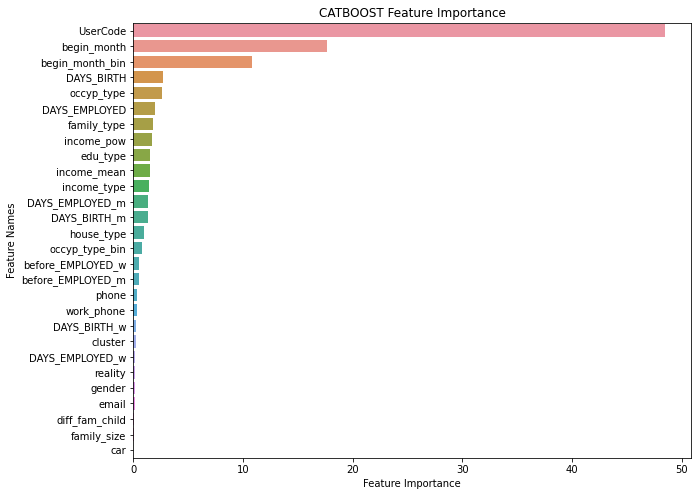

In [127]:
plot_feature_importance(grid_search_cat.best_estimator_.feature_importances_,x_test.columns,'CATBOOST')

### GridSearchCV & LGBM Classifier

In [128]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss
import numpy as np

# LGBMClassifier 모델 객체 생성
model_lgbm = LGBMClassifier()

param_grid = {
    'max_depth': [8],
    'learning_rate': [0.05, 0.1],
    'reg_lambda': [5],
    'min_child_samples': [20, 30],
    'subsample': [0.5, 0.7, 1.0],
}

# GridSearchCV 객체 생성
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss')

# 그리드서치를 사용하여 모델 학습
grid_search_lgbm.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_lgbm.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_lgbm_proba = grid_search_lgbm.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_lgbm_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_child_samples': 30, 'reg_lambda': 5, 'subsample': 0.5}
Log Loss: 0.636824


In [129]:
# 결과분석
pred_y_lgbm_proba = grid_search_lgbm.predict_proba(x_test)
pred_y_lgbm = grid_search_lgbm.best_estimator_.predict(x_test)

In [130]:
# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_lgbm_proba, labels=[0, 1, 2])
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.884261


In [131]:
# 결과 리포트 출력
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_y_lgbm))

              precision    recall  f1-score   support

         0.0       0.60      0.34      0.44       644
         1.0       0.63      0.91      0.75      1254
         2.0       0.34      0.04      0.08       320

    accuracy                           0.62      2218
   macro avg       0.52      0.43      0.42      2218
weighted avg       0.58      0.62      0.56      2218



In [132]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_lgbm, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.432535


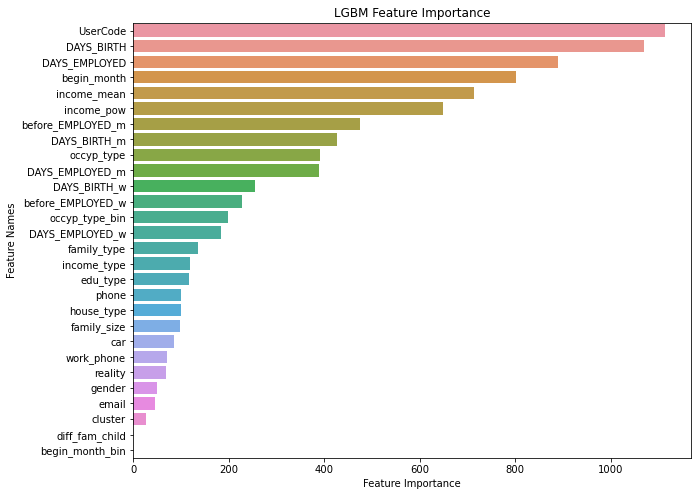

In [133]:
plot_feature_importance(grid_search_lgbm.best_estimator_.feature_importances_,x_test.columns,'LGBM')

### GridSearch & RandomForest

In [134]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 객체 생성
model_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
}

# GridSearchCV 객체 생성
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=n_fold, scoring='neg_log_loss')

# 그리드서치를 사용하여 모델 학습
grid_search_rf.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best Parameters:", grid_search_rf.best_params_)

# 최적 모델로 전체 데이터에 대한 예측 수행
pred_y_rf_proba = grid_search_rf.predict_proba(x_train)

# 전체 데이터에 대한 Log Loss 계산
train_log_loss = log_loss(y_train, pred_y_rf_proba)
print(f'Log Loss: {train_log_loss:.6f}')

Best Parameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Log Loss: 0.376815


In [135]:
# 결과분석
pred_y_rf_proba = grid_search_rf.predict_proba(x_test)
pred_y_rf = grid_search_rf.best_estimator_.predict(x_test)

In [136]:
# 테스트 데이터에 대한 예측 결과 확인
test_log_loss = log_loss(y_test, pred_y_rf_proba, labels=[0, 1, 2])
print(f'Test Log Loss Score: {test_log_loss:.6f}')

Test Log Loss Score: 0.834724


In [137]:
from sklearn.metrics import recall_score

# y_true: 실제 레이블, y_pred: 예측된 레이블
# average='macro'는 다중 클래스에서 각 클래스의 재현율을 계산한 후 평균을 취합니다.
recall = recall_score(y_test, pred_y_rf, average='macro')

print(f'Recall Score: {recall:.6f}')

Recall Score: 0.475909


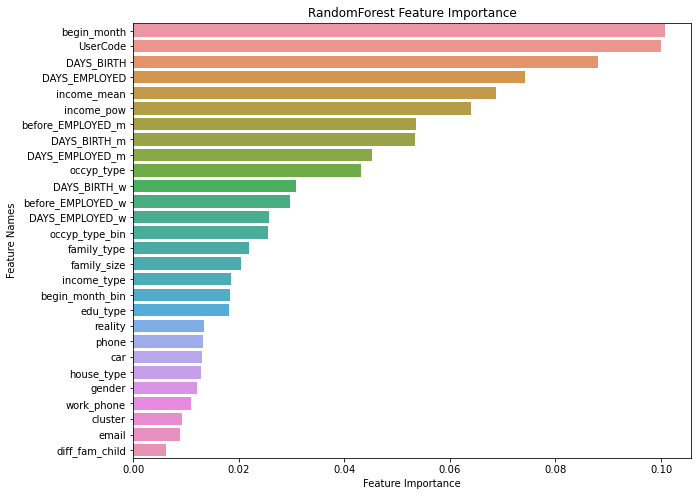

In [138]:
plot_feature_importance(grid_search_rf.best_estimator_.feature_importances_,x_test.columns,'RandomForest')